<a href="https://colab.research.google.com/github/adelrio89/codecademy/blob/main/Tarea_2_Gesti%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 2** (fecha de entrega: 24 de Julio 2021)


Esta tarea consistirá de tres preguntas las cuales deberá responder de forma completa (código, texto e imágenes explicativas). Puede entregar la tarea en el formato, que estime conveniente (doc, pdf, script de R, url de Colab) pero tenga en cuenta que debe adjuntar el código utilizado. Se recomienda el uso de Colab R (recordar dejar el notebook compartido).


En el taller 3 trabajamos con una base de datos de alumnos en el sistema de Educación Superior. La idea de esta tarea es ampliar el modelo de datos, entender como se relacionan las diferentes tablas y, extraer información relevante para generar insights importantes. 

##**Pregunta 1 (1 pt)**

En el taller se elaboró un modelo de datos Entidad - Relación con la matricula de Educación Superior. Complemente este modelo agregando la información del archivo "Rendimiento Escolar del año 2019".


La base de datos se encuentra disponible en http://datos.mineduc.cl/dashboards/19881/informacion-de-rendimiento-academico/.

**Tip 1:** Para elaborar el modelo, debe crear al menos una nueva entidad y  al menos una nueva relacion (junto con sus atributos), y ver como se relacionan con las creadas en el taller.

**Tip 2:** De acuerdo a lo que se vio en el taller, es necesario revisar el esquema de registro (http://datos.mineduc.cl/datasets/191683-er-rendimiento-por-alumno.download/).

**P.d:** Finalmente, en este link puede ver (más no editar) el modelo elaborado en el taller: https://app.creately.com/diagram/h6ZxbP2gf6D/edit


---

[Diagrama Entidad Relación - Lucidchart](https://lucid.app/lucidchart/invitations/accept/inv_4d5a845b-9481-4818-947b-44562a045fb2)


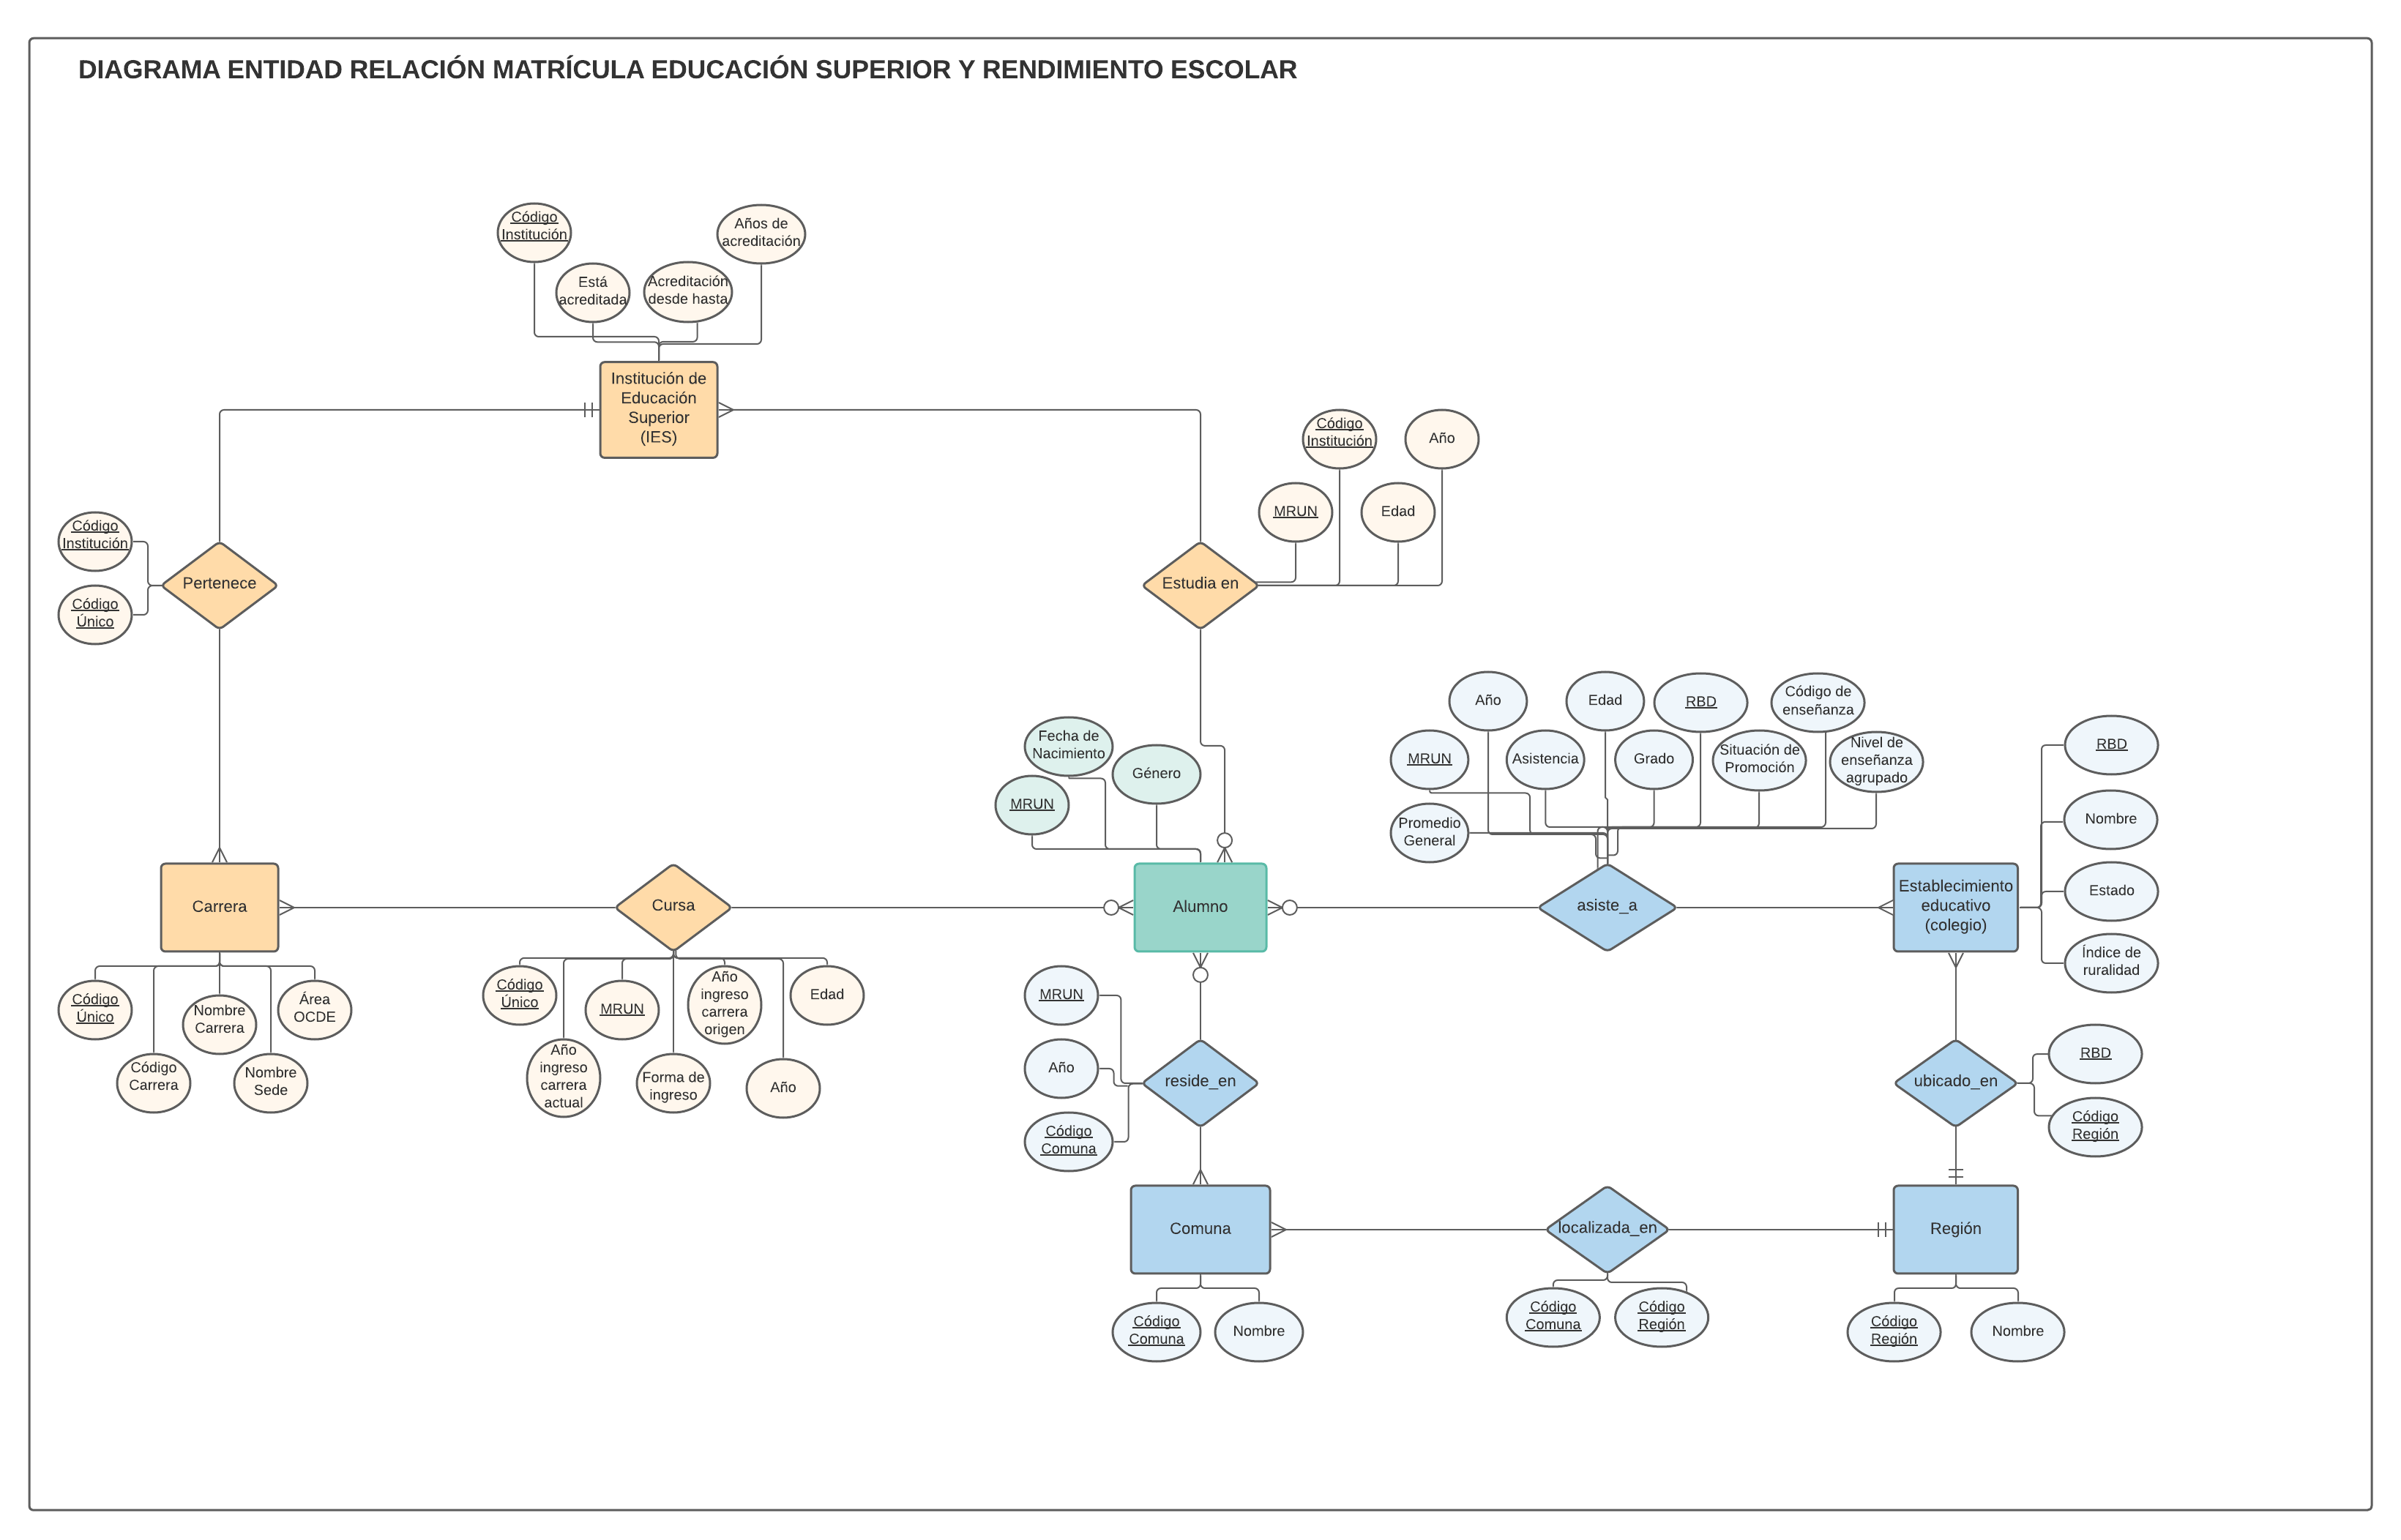

##**Pregunta 2 (2.5 pts)**

Haga un análisis de la calidad de datos de la tabla de Rendimiento 2019. Para ello, determine la completitud, consistencia y validez de sus datos. Si bien puede guiarse por el taller, analisis calcados (con los mismos atributos) del taller no serán considerados como validos

**a)** (1 pts) Calcule la completitud de: las tuplas, los atributos de la tabla y la tabla completa. Además señale aquellos atributos donde haya más errores y detallando en que casos la mayor presencia de datos faltantes es de una menor gravedad. Una vez hecho los calculos describa y presente graficos (de barra, histogramas) para facilitar la explicacion de los resultados.

**b)** (0.7 pts) Desarrolle un analisis de validez para:

*   Una restriccion de rango
*   Una restriccion de unicidad
*   Una restriccion de pertenencia con algun atributo que sea categorico (puede guiarse por el esquema del registro)

Para esto seleccione un atributo de la tabla para cada tipo de restricción, explique por qué eligió y explique sus resultados

**c)** (0.8 pts) Analice la consistencia de 3 atributos con respecto a otros de la misma tabla que entregan una informacion similar.

**Tip:** Puede compararlos de manera similar al taller.



---



In [1]:
system("gdown https://drive.google.com/uc?id=1dCapTadgVjHrH5S0nFlrhIrX9FOtENCK")

In [ ]:
#system("wget http://datos.mineduc.cl/datasets/191801-rendimiento-escolar-ano-2019.download/")
#system("mv /content/index.html /content/rendimiento_2019.zip")


In [2]:
library(tidyverse)
library(data.table)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
#lista <- unzip("/content/rendimiento_2019.zip")
rendimiento_2019 <- fread("20200220_Rendimiento_2019_20200131_PUBL.csv")

In [4]:
class(rendimiento_2019)

[1] "data.table" "data.frame"

In [5]:
setDF(rendimiento_2019)
class(rendimiento_2019)

[1] "data.frame"

In [6]:
head(rendimiento_2019)

AGNO RBD DGV_RBD NOM_RBD                 COD_REG_RBD NOM_REG_RBD_A
1 2019 1   9       LICEO POLITECNICO ARICA 15          AYP          
2 2019 1   9       LICEO POLITECNICO ARICA 15          AYP          
3 2019 1   9       LICEO POLITECNICO ARICA 15          AYP          
4 2019 1   9       LICEO POLITECNICO ARICA 15          AYP          
5 2019 1   9       LICEO POLITECNICO ARICA 15          AYP          
6 2019 1   9       LICEO POLITECNICO ARICA 15          AYP          
  COD_PRO_RBD COD_COM_RBD NOM_COM_RBD COD_DEPROV_RBD ⋯ COD_COM_ALU
1 151         15101       ARICA       151            ⋯ 15101      
2 151         15101       ARICA       151            ⋯ 15101      
3 151         15101       ARICA       151            ⋯ 15101      
4 151         15101       ARICA       151            ⋯ 15101      
5 151         15101       ARICA       151            ⋯  1107      
6 151         15101       ARICA       151            ⋯ 13124      
  NOM_COM_ALU   COD_RAMA COD_SEC COD_ESPE PROM_GRAL ASISTENCIA SIT_FIN
1 ARICA         400      410     41001    5         85         P      
2 ARICA         400      410     41001    0          0         Y      
3 ARICA         400      410     41001    4,9       89         R      
4 ARICA         400      410     41001    0          0         Y      
5 ALTO HOSPICIO 400      410     41001    0          0         Y      
6 PUDAHUEL      400      410     41001    5,1       89         P      
  SIT_FIN_R COD_MEN
1 P         0      
2 Y         0      
3 R         0      
4 Y         0      
5 T         0      
6 P         0

In [7]:
rendimiento_2019$PROM_GRAL <- as.numeric(gsub(',','.', rendimiento_2019$PROM_GRAL))

In [8]:
rendimiento_2019$PROM_GRAL

[1] 5.0 0.0 4.9 0.0 0.0 5.1 5.9 7.0 0.0 6.0 0.0 5.2 6.3 6.3 6.2 0.0 5.3 0.0
   [19] 0.0 6.0 5.1 5.5 0.0 5.4 0.0 3.4 5.4 6.4 4.8 4.9 5.1 5.8 5.9 5.8 5.5 0.0
   [37] 6.1 3.0 0.0 0.0 4.9 0.0 6.3 5.1 6.5 0.0 5.7 4.9 5.1 2.7 5.3 0.0 4.8 0.0
   [55] 6.0 6.0 5.0 6.1 3.7 5.9 3.6 6.2 5.0 5.5 0.0 5.9 5.5 0.0 5.4 4.8 5.2 4.8
   [73] 4.9 5.9 5.8 0.0 5.3 0.0 5.4 6.0 5.7 0.0 6.4 5.6 5.9 5.6 5.2 0.0 6.1 6.6
   [91] 5.0 6.2 6.2 6.4 4.2 5.9 0.0 3.5 6.3 0.0 5.7 6.0 4.8 6.1 5.4 0.0 4.7 0.0
  [109] 5.5 6.0 0.0 0.0 5.1 5.8 0.0 4.9 5.3 5.4 5.8 5.9 5.4 5.8 5.2 6.1 0.0 5.6
  [127] 0.0 6.1 5.0 5.4 5.3 0.0 0.0 6.0 0.0 4.7 5.4 5.9 5.7 5.4 6.3 5.6 5.6 4.9
  [145] 5.8 5.4 5.7 0.0 0.0 5.3 3.9 5.5 5.7 4.9 0.0 0.0 5.5 5.5 4.9 5.4 5.3 5.2
  [163] 4.6 4.9 5.7 5.2 5.2 6.0 5.9 0.0 6.1 0.0 5.3 5.8 0.0 5.6 5.9 5.5 4.8 5.4
  [181] 5.6 5.1 4.8 5.0 5.3 5.1 5.6 0.0 4.8 4.8 4.5 0.0 5.5 5.9 5.7 5.8 5.8 5.1
  [199] 4.2 0.0 0.0 4.7 5.9 4.9 4.8 4.8 4.5 0.0 0.0 4.8 5.8 0.0 0.0 0.0 0.0 6.1
  [217] 5.8 5.9 5.2 5.6 0.0 6.1 0.0 0.0 5.2 6.2 0.0 5.5 6.0 6.3 0.0 5.7 5.7 5.1
  [235] 5.8 5.3 5.3 5.9 0.0 6.0 0.0 5.1 6.7 5.4 5.8 0.0 5.0 5.6 6.5 0.0 5.4 6.5
  [253] 4.5 4.5 5.1 5.1 5.1 5.1 5.1 6.0 6.0 4.6 5.3 0.0 0.0 5.9 4.8 4.7 0.0 6.1
  [271] 0.0 5.8 0.0 5.4 5.3 0.0 5.7 5.6 6.1 6.1 5.2 6.3 5.7 5.9 6.0 6.1 5.6 6.2
  [289] 5.5 0.0 5.5 5.5 5.8 6.3 6.3 5.8 0.0 6.3 5.4 6.4 5.9 5.7 5.2 5.4 5.1 0.0
  [307] 6.7 5.6 6.0 5.7 6.7 6.2 6.7 5.1 5.2 5.4 6.2 5.3 5.8 5.4 5.2 6.7 6.4 5.0
  [325] 5.7 5.9 0.0 5.7 6.0 5.8 5.9 3.9 0.0 5.3 6.0 5.8 6.4 5.9 6.1 5.7 4.3 4.7
  [343] 6.4 5.8 5.4 5.4 6.0 6.1 5.1 5.3 5.5 5.2 0.0 5.3 4.7 5.9 6.2 4.8 6.3 4.5
  [361] 4.6 4.9 0.0 5.1 4.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 6.0 0.0 0.0 0.0 4.5 0.0
  [379] 0.0 6.1 0.0 0.0 0.0 5.8 4.9 0.0 0.0 4.9 0.0 4.4 0.0 0.0 0.0 4.4 4.9 0.0
  [397] 0.0 0.0 3.6 5.9 0.0 4.4 4.9 0.0 0.0 3.7 6.7 6.6 0.0 0.0 0.0 7.0 0.0 4.8
  [415] 4.9 0.0 0.0 0.0 0.0 5.1 6.0 6.1 0.0 0.0 4.9 6.6 6.5 4.1 5.4 0.0 0.0 6.0
  [433] 6.4 6.4 0.0 0.0 6.2 0.0 6.9 0.0 0.0 3.6 0.0 0.0 0.0 0.0 4.9 6.3 6.2 0.0
  [451] 6.1 0.0 4.9 5.2 0.0 6.4 5.1 0.0 0.0 4.5 6.0 0.0 0.0 6.2 0.0 4.3 4.6 0.0
  [469] 0.0 0.0 6.2 0.0 0.0 4.6 4.0 0.0 0.0 0.0 4.3 0.0 4.7 0.0 0.0 0.0 0.0 3.1
  [487] 0.0 0.0 0.0 0.0 5.7 0.0 0.0 4.9 0.0 5.1 0.0 0.0 0.0 4.1 0.0 3.2 0.0 0.0
  [505] 5.7 6.4 0.0 0.0 5.3 5.1 5.7 0.0 5.0 0.0 0.0 6.3 6.6 6.7 0.0 3.2 0.0 0.0
  [523] 5.8 0.0 4.9 0.0 0.0 6.2 0.0 0.0 0.0 0.0 0.0 5.2 5.4 0.0 5.5 0.0 0.0 0.0
  [541] 0.0 0.0 0.0 6.6 0.0 4.9 0.0 0.0 0.0 5.5 5.2 6.3 0.0 0.0 6.4 0.0 0.0 0.0
  [559] 0.0 6.4 5.7 5.9 4.8 4.8 0.0 0.0 4.5 0.0 4.8 4.8 5.8 0.0 5.3 6.4 0.0 6.1
  [577] 4.4 0.0 5.6 0.0 5.2 0.0 0.0 0.0 0.0 0.0 5.4 5.7 4.8 0.0 0.0 5.7 0.0 5.5
  [595] 0.0 0.0 5.4 6.5 0.0 5.0 5.7 5.8 0.0 5.5 0.0 0.0 5.7 5.1 5.0 0.0 4.9 5.4
  [613] 5.8 6.3 5.7 6.3 6.3 5.7 6.1 5.7 4.9 5.4 5.7 0.0 0.0 5.7 0.0 5.0 0.0 0.0
  [631] 5.6 5.4 0.0 6.3 5.3 5.6 5.8 5.5 5.5 6.1 0.0 5.6 5.7 5.7 6.3 6.5 6.1 0.0
  [649] 6.5 0.0 6.5 5.9 6.1 6.1 4.9 6.4 6.8 5.7 0.0 5.0 0.0 6.6 4.6 5.7 0.0 5.0
  [667] 5.1 6.0 5.0 6.0 5.8 6.2 6.1 5.8 6.5 6.3 0.0 4.4 0.0 6.2 6.8 6.4 5.6 6.0
  [685] 6.4 0.0 6.5 4.4 6.6 5.4 6.2 5.8 6.7 0.0 6.0 5.3 6.5 6.0 5.7 5.2 5.6 5.2
  [703] 6.9 6.9 5.1 6.2 5.9 5.9 5.2 5.7 0.0 0.0 5.0 4.9 6.4 6.0 0.0 0.0 6.4 6.4
  [721] 0.0 0.0 6.0 5.8 5.4 0.0 0.0 0.0 0.0 5.2 0.0 0.0 5.9 0.0 0.0 5.4 0.0 0.0
  [739] 6.4 6.7 6.3 0.0 6.2 0.0 0.0 4.5 6.2 0.0 6.2 5.5 6.3 6.4 4.7 0.0 0.0 5.6
  [757] 0.0 5.6 5.1 0.0 0.0 6.1 5.5 0.0 4.9 6.1 5.9 6.5 4.6 5.8 6.3 0.0 6.2 6.6
  [775] 0.0 6.4 6.3 5.0 5.7 6.1 0.0 6.3 5.5 5.8 5.9 5.2 5.9 6.6 5.7 0.0 0.0 0.0
  [793] 0.0 5.0 5.1 5.0 0.0 5.9 6.1 4.7 5.5 0.0 4.9 6.1 4.6 5.1 6.4 6.5 6.6 5.5
  [811] 5.3 5.7 5.8 6.4 5.7 6.5 5.8 4.9 5.6 5.1 5.4 0.0 5.9 6.0 0.0 6.7 6.0 6.2
  [829] 4.7 5.6 6.1 7.0 5.7 6.1 5.3 5.8 5.0 3.0 3.5 3.0 6.8 5.2 5.0 6.7 6.0 5.2
  [847] 5.2 5.3 6.0 3.0 0.0 4.9 5.7 5.8 5.9 5.9 5.4 5.6 6.0 6.0 6.0 5.7 0.0 5.8
  [865] 5.8 5.0 0.0 5.6 5.7 6.0 5.7 6.1 5.8 5.7 5.8 5.9 5.5 5.7 5.9 6.0 5.7 5.7
  [883] 6.0 5.9 5.8 6.0 5.7 5.8 5.7 6.0 6.0 5.8 5.6 3.0 4.1 4.2 4.0 4.2 4.1 0.0
  [9

**a) Completitud.**


1.   Completitud de columnas





In [ ]:
# total casos NA por columna
casos_na_col <- colSums(is.na(rendimiento_2019))
print(casos_na_col)
# total observaciones
total_casos <- nrow(rendimiento_2019)
print(total_casos)
# total completitud por columnas
completitud_col <- 100-((casos_na_col / total_casos)*100)
print(completitud_col)

          AGNO            RBD        DGV_RBD        NOM_RBD    COD_REG_RBD 
             0              0              0              0              0 
 NOM_REG_RBD_A    COD_PRO_RBD    COD_COM_RBD    NOM_COM_RBD COD_DEPROV_RBD 
             0              0              0              0              0 
NOM_DEPROV_RBD       COD_DEPE      COD_DEPE2      RURAL_RBD   ESTADO_ESTAB 
             0              0              0              0              0 
      COD_ENSE      COD_ENSE2      COD_GRADO        LET_CUR        COD_JOR 
             0              0              0              0              0 
   COD_TIP_CUR    COD_DES_CUR           MRUN        GEN_ALU    FEC_NAC_ALU 
             0              0              0              0              0 
      EDAD_ALU    COD_REG_ALU    COD_COM_ALU    NOM_COM_ALU       COD_RAMA 
           271              0              0              0              0 
       COD_SEC       COD_ESPE      PROM_GRAL     ASISTENCIA        SIT_FIN 
            

In [ ]:
# De la manera vista en clase
completitud_col_apply <- apply(is.na(rendimiento_2019), 2, mean)
print(100-(completitud_col_apply*100))

          AGNO            RBD        DGV_RBD        NOM_RBD    COD_REG_RBD 
     100.00000      100.00000      100.00000      100.00000      100.00000 
 NOM_REG_RBD_A    COD_PRO_RBD    COD_COM_RBD    NOM_COM_RBD COD_DEPROV_RBD 
     100.00000      100.00000      100.00000      100.00000      100.00000 
NOM_DEPROV_RBD       COD_DEPE      COD_DEPE2      RURAL_RBD   ESTADO_ESTAB 
     100.00000      100.00000      100.00000      100.00000      100.00000 
      COD_ENSE      COD_ENSE2      COD_GRADO        LET_CUR        COD_JOR 
     100.00000      100.00000      100.00000      100.00000      100.00000 
   COD_TIP_CUR    COD_DES_CUR           MRUN        GEN_ALU    FEC_NAC_ALU 
     100.00000      100.00000      100.00000      100.00000      100.00000 
      EDAD_ALU    COD_REG_ALU    COD_COM_ALU    NOM_COM_ALU       COD_RAMA 
      99.99186      100.00000      100.00000      100.00000      100.00000 
       COD_SEC       COD_ESPE      PROM_GRAL     ASISTENCIA        SIT_FIN 
     100.000

In [ ]:
# Número de casos NA en el atributo EDAD_ALU
casos_na_edad <- sum(is.na(rendimiento_2019$EDAD_ALU))
print(casos_na_edad)
# total casos
total <- nrow(rendimiento_2019)
print(total)
# % de casos NA en EDAD_ALU
print((casos_na_edad / total)*100)
# completitud
print(100 - (casos_na_edad / total)*100)

[1] 271
[1] 3328915
[1] 0.008140791
[1] 99.99186


Todas las columnas tienen una completitud del 100%, excepto EDAD_ALU 0.008% de valores perdidos.






2.   Completitud de filas



In [ ]:
# total casos NA por fila
casos_na_filas <- rowSums(is.na(rendimiento_2019))
# filtra las filas que tienen al menos un NA
casos_na_filas <- casos_na_filas[casos_na_filas>0]
print(casos_na_filas)
print(length(casos_na_filas))
# total variables
total_casos <- length(rendimiento_2019)
print(total_casos)
# total completitud por filas
completitud_filas <- 100-((casos_na_filas / total_casos)*100)
print(completitud_filas)

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1
[1] 271
[1] 37
  [1] 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973
 [10] 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973
 [19] 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973
 [28] 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973
 [37] 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973 97.2973
 [46]

Todas las filas tienen una completitud del 100%, excepto 271 filas, debido a los NA en la columna EDAD_ALU


3. Completitud de tabla

In [ ]:
# total casos NA en la tabla
casos_na_tabla <- sum(is.na(rendimiento_2019))
print(casos_na_tabla)
# total datos (filas x columnas)
total_casos <- nrow(rendimiento_2019) * length(rendimiento_2019)
print(total_casos)
# total completitud de tabla
completitud_tabla <- 100-((casos_na_tabla / total_casos)*100)
print(completitud_tabla)

[1] 271
[1] 123169855
[1] 99.99978


4.   Gráficos para explicar completitud


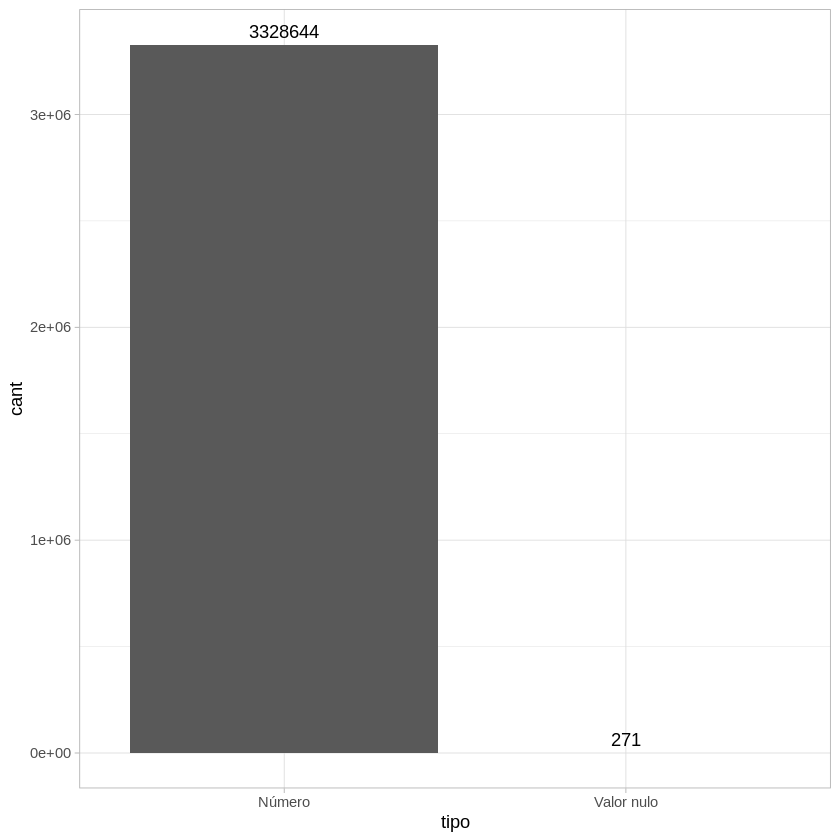

In [ ]:
data_edad <- rendimiento_2019 %>% mutate(tipo=ifelse(is.na(EDAD_ALU),'Valor nulo','Número')) %>% group_by(tipo) %>% summarise(cant=n())
ggplot(data_edad, aes(x=tipo,y=cant)) + geom_col() + geom_text(aes(label=cant),vjust = -0.5) + theme_light() 

**b) Análisis de Validez**

*   Una restriccion de rango. <br>
% anual de asistencia (ASISTENCIA). Se espera que el % de asistencia de los alumnos esté en el rango [0, 100]. 

In [ ]:
# valores únicos en la columna ASISTENCIA
sort(unique(rendimiento_2019$ASISTENCIA))

[1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100

El % anual de asistencia es uno de los atributos seleccionados en mi modelo entidad relación. Se confirma que los % anuales de asistencia en la base se encuentran en un rango válido [0, 100]

*   Una restriccion de unicidad <br>
Unicidad de tupla Código de establecimiento (RBD) y Código de la región del establecimiento (COD_REG_RBD). Se espera que cada establecimiento esté localizado en una sola región. En otras palabras, que no hayan registros de un establecimiento en dos regiones distintas.


In [ ]:
# número de establecimientos
establec <- rendimiento_2019 %>% select(RBD) %>% distinct()
print(nrow(establec))
# establecimiento (RBD) y región donde se encuentra establecimiento (COD_REG_RBD)
reg_establec <- rendimiento_2019 %>% select(RBD, COD_REG_RBD) %>% distinct() 
print(nrow(reg_establec))

[1] 9114
[1] 9114


Se confirma la unicidad de la tupla de atributos RBD y COD_REG_RBD. Esto es importante porque en el modelo entidad-relación del punto 1 se establecido esta condición de unicidad en la relación "ubicado_en"

*   Una restriccion de pertenencia con algun atributo que sea categorico (puede guiarse por el esquema del registro) <br>
Situación de promoción (SIT_FIN). Se espera que esta columna solamente tenga los valores: P: Promovido, R: Reprobado, Y: Retirado, En blanco: Sin información

In [ ]:
# valores únicos en la columna Situación de promoción (SIT_FIN)
unique(rendimiento_2019$SIT_FIN)

[1] "P" "Y" "R" ""

Se confirma pertenencia de valores en atributo categórico.

**c) Consistencia**

Situación de promoción al cierre del
año escolar (SIT_FIN) vs Situación de promoción al cierre del
año escolar, con indicador de traslado (SIT_FIN_R)

In [ ]:
# Relación en la base entre atributos SIT_FIN y SIT_FIN_R 
rendimiento_2019 %>% select(SIT_FIN, SIT_FIN_R) %>% distinct() 

SIT_FIN SIT_FIN_R
1 P       P        
2 Y       Y        
3 R       R        
4 Y       T        
5 R       T        
6         T        
7

In [ ]:
# Relación en la base entre atributos COD_ENSE y COD_ENSE2
rendimiento_2019 %>% select(COD_ENSE, COD_ENSE2) %>% distinct() 

COD_ENSE COD_ENSE2
1  463      8        
2  510      7        
3  563      8        
4  610      7        
5  663      8        
6  863      8        
7  165      3        
8  167      3        
9  363      6        
10 310      5        
11 110      2        
12 410      7        
13 710      7        
14 810      7        
15 910      7        
16 763      8

In [ ]:
# Relación entre el código y la comuna de residencia del alumno.
# número de códigos de comunas
rendimiento_2019 %>% select(COD_COM_ALU) %>% distinct() %>% nrow() %>% print()
# número de códigos y nombres de comunas únicos
rendimiento_2019 %>% select(COD_COM_ALU, NOM_COM_ALU) %>% distinct() %>% nrow() %>% print()
# primeros valores de tabla de códigos y nombres de comunas
rendimiento_2019 %>% select(COD_COM_ALU, NOM_COM_ALU) %>% distinct() %>% filter(NOM_COM_ALU == '')

[1] 347
[1] 347


COD_COM_ALU NOM_COM_ALU
1 0

In [ ]:
sort(unique(rendimiento_2019$NOM_COM_ALU))

[1] ""                     "ALGARROBO"            "ALHUÉ"               
  [4] "ALTO BIOBÍO"          "ALTO DEL CARMEN"      "ALTO HOSPICIO"       
  [7] "ANCUD"                "ANDACOLLO"            "ANGOL"               
 [10] "ANTÁRTICA"            "ANTOFAGASTA"          "ANTUCO"              
 [13] "ARAUCO"               "ARICA"                "AYSÉN"               
 [16] "BUIN"                 "BULNES"               "CABILDO"             
 [19] "CABO DE HORNOS"       "CABRERO"              "CALAMA"              
 [22] "CALBUCO"              "CALDERA"              "CALERA"              
 [25] "CALERA DE TANGO"      "CALLE LARGA"          "CAMARONES"           
 [28] "CAMIÑA"               "CANELA"               "CAÑETE"              
 [31] "CARAHUE"              "CARTAGENA"            "CASABLANCA"          
 [34] "CASTRO"               "CATEMU"               "CAUQUENES"           
 [37] "CERRILLOS"            "CERRO NAVIA"          "CHAITÉN"             
 [40] "CHAÑARAL"             "CHANCO"               "CHÉPICA"             
 [43] "CHIGUAYANTE"          "CHILE CHICO"          "CHILLÁN"             
 [46] "CHILLÁN VIEJO"        "CHIMBARONGO"          "CHOLCHOL"            
 [49] "CHONCHI"              "CISNES"               "COBQUECURA"          
 [52] "COCHAMÓ"              "COCHRANE"             "CODEGUA"             
 [55] "COELEMU"              "COIHUECO"             "COINCO"              
 [58] "COLBÚN"               "COLCHANE"             "COLINA"              
 [61] "COLLIPULLI"           "COLTAUCO"             "COMBARBALÁ"          
 [64] "CONCEPCIÓN"           "CONCHALÍ"             "CONCÓN"              
 [67] "CONSTITUCIÓN"         "CONTULMO"             "COPIAPÓ"             
 [70] "COQUIMBO"             "CORONEL"              "CORRAL"              
 [73] "COYHAIQUE"            "CUNCO"                "CURACAUTÍN"          
 [76] "CURACAVÍ"             "CURACO DE VÉLEZ"      "CURANILAHUE"         
 [79] "CURARREHUE"           "CUREPTO"              "CURICÓ"              
 [82] "DALCAHUE"             "DIEGO DE ALMAGRO"     "DOÑIHUE"             
 [85] "EL BOSQUE"            "EL CARMEN"            "EL MONTE"            
 [88] "EL QUISCO"            "EL TABO"              "EMPEDRADO"           
 [91] "ERCILLA"              "ESTACIÓN CENTRAL"     "FLORIDA"             
 [94] "FREIRE"               "FREIRINA"             "FRESIA"              
 [97] "FRUTILLAR"            "FUTALEUFÚ"            "FUTRONO"             
[100] "GALVARINO"            "GENERAL LAGOS"        "GORBEA"              
[103] "GRANEROS"             "GUAITECAS"            "HIJUELAS"            
[106] "HUALAIHUÉ"            "HUALAÑÉ"              "HUALPÉN"             
[109] "HUALQUI"              "HUARA"                "HUASCO"              
[112] "HUECHURABA"           "ILLAPEL"              "INDEPENDENCIA"       
[115] "IQUIQUE"              "ISLA DE MAIPO"        "ISLA DE PASCUA"      
[118] "JUAN FERNÁNDEZ"       "LA CISTERNA"          "LA CRUZ"             
[121] "LA ESTRELLA"          "LA FLORIDA"           "LA GRANJA"           
[124] "LA HIGUERA"           "LA LIGUA"             "LA PINTANA"          
[127] "LA REINA"             "LA SERENA"            "LA UNIÓN"            
[130] "LAGO RANCO"           "LAGO VERDE"           "LAGUNA BLANCA"       
[133] "LAJA"                 "LAMPA"                "LANCO"               
[136] "LAS CABRAS"           "LAS CONDES"           "LAUTARO"             
[139] "LEBU"                 "LICANTÉN"             "LIMACHE"             
[142] "LINARES"              "LITUECHE"             "LLAILLAY"            
[145] "LLANQUIHUE"           "LO BARNECHEA"         "LO ESPEJO"           
[148] "LO PRADO"             "LOLOL"                "LONCOCHE"            
[151] "LONGAVÍ"              "LONQUIMAY"            "LOS ÁLAMOS"          
[154] "LOS ANDES"            "LOS ÁNGELES"          "LOS LAGOS"           
[157] "LOS MUERMOS"          "LOS SAUCES"           "LOS VILOS"           
[160] "LOTA"               

##**Pregunta 3 (3.5 pts.)**

Finalmente, trabajará con el modelo de datos y unirá la tabla de rendimiento 2019 con la matrícula de educación superior 2020, para realizar un trabajo exhaustivo de análisis. Para esto usted debe usar RSQLite y los comandos para cargar datos, además de realizar consultas mediante el lenguaje SQL.

**a)** (0.7 pts) Limpie ambas tablas, de acuerdo a lo observado en la pregunta 2, y carguelas a la base de datos, continuando lo hecho en el taller y su modelo de datos.

**b)** (0.8 pts) Analice la validez de los datos, para esto escriba la siguiente consulta:

`Obtener todos los MRUN de los alumnos que reprobaron cuarto medio y se matricularon a la universidad.`

¿Qué significa el resultado obtenido?

**c)** (2 pts) Realice 2 consultas a la base de datos que involucren a alguna de las entidades de rendimiento y las de matricula. Explique el objetivo de las consultas, luego presente los resultados graficandolos de manera adecuada y finalice con una pequeña conclusion de su analisis.


In [9]:
install.packages("RSQLite")
library(RSQLite)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’




In [10]:
install.packages("tictoc")
library("tictoc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




**a) Limpieza y carga de datos en base SQLite.**

*   Modelo de datos Matrícula 2020 (tomado del taller 3)





In [11]:
system("gdown --id 1dXpk0MP6eXcgzfsFT4fnwjchecMwrNmZ")

In [12]:
system("unzip /content/20200706_Matrcula_Ed_Superior_2020_PUBL_MRUN.zip")

In [13]:
matricula <- read.csv2("20200706_Matrícula_Ed_Superior_2020_PUBL_MRUN.csv")

In [15]:
alumnos_mat <- matricula[, c("MRUN", "GEN_ALU", "FEC_NAC_ALU")]
estudia_en <- matricula[,c("MRUN", "cod_inst", "cat_periodo", "rango_edad")] 
cursa <- matricula[,c("MRUN","codigo_unico", "cat_periodo", "rango_edad", "anio_ing_carr_ori", "sem_ing_carr_ori", "anio_ing_carr_act", "sem_ing_carr_act", "forma_ingreso")] 
carrera <- matricula[, c("codigo_unico", "cod_sede", "nomb_sede", "cod_carrera", "nomb_carrera", "modalidad", "jornada", "version", "tipo_plan_carr", "dur_estudio_carr", "dur_proceso_tit", "dur_total_carr", "region_sede", "provincia_sede", "comuna_sede", "nivel_global", "nivel_carrera_1", "nivel_carrera_2", "requisito_ingreso",  "vigencia_carrera", "valor_matricula", "valor_arancel", "codigo_demre", "area_conocimiento", "oecd_area",  "oecd_subarea", "area_carrera_generica", "acreditada_carr", "costo_proceso_titulacion",  "costo_obtencion_titulo_diploma" )]
IES <- matricula[, c("cod_inst","tipo_inst_1", "tipo_inst_2", "tipo_inst_3", "nomb_inst", "acreditada_inst", "acre_inst_desde_hasta", "acre_inst_anio")]
pertenece_a <- matricula[,c( "codigo_unico","cod_inst")]

In [16]:
# Limpiar eliminando llaves vacíos
alumnos_mat <- alumnos_mat[!is.na(alumnos_mat$MRUN), ]
cursa <- cursa[!is.na(cursa$MRUN), ]
estudia_en <- estudia_en[!is.na(estudia_en$MRUN), ]

In [17]:
#Eliminamos información repetida
alumnos_mat <- unique(alumnos_mat)
carrera <- unique(carrera)
IES <- unique(IES)

estudia_en <- unique(estudia_en)
cursa <- unique(cursa)
pertenece_a <- unique(pertenece_a)

In [18]:
conn <- dbConnect(RSQLite::SQLite(), "mineduc.db")

In [19]:
dbWriteTable(conn , name = "IES", 
                  value = IES,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "carrera", 
                  value = carrera,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "estudia_en", 
                  value = estudia_en,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "pertenece_a", 
                  value = pertenece_a,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "cursa", 
                  value = cursa,
                  row.names = FALSE, overwrite = TRUE)

*   Modelo de datos Rendimiento Escolar 2019

In [20]:
# Quitar filas con NAs
rendimiento_sin_na <- rendimiento_2019[!is.na(rendimiento_2019$EDAD_ALU),]

In [21]:
nrow(rendimiento_2019) - nrow(rendimiento_sin_na)

[1] 271

In [22]:
colnames(rendimiento_2019)

[1] "AGNO"           "RBD"            "DGV_RBD"        "NOM_RBD"       
 [5] "COD_REG_RBD"    "NOM_REG_RBD_A"  "COD_PRO_RBD"    "COD_COM_RBD"   
 [9] "NOM_COM_RBD"    "COD_DEPROV_RBD" "NOM_DEPROV_RBD" "COD_DEPE"      
[13] "COD_DEPE2"      "RURAL_RBD"      "ESTADO_ESTAB"   "COD_ENSE"      
[17] "COD_ENSE2"      "COD_GRADO"      "LET_CUR"        "COD_JOR"       
[21] "COD_TIP_CUR"    "COD_DES_CUR"    "MRUN"           "GEN_ALU"       
[25] "FEC_NAC_ALU"    "EDAD_ALU"       "COD_REG_ALU"    "COD_COM_ALU"   
[29] "NOM_COM_ALU"    "COD_RAMA"       "COD_SEC"        "COD_ESPE"      
[33] "PROM_GRAL"      "ASISTENCIA"     "SIT_FIN"        "SIT_FIN_R"     
[37] "COD_MEN"

In [23]:
# Entidades
alumnos_ren <- rendimiento_sin_na[, c("MRUN", "GEN_ALU", "FEC_NAC_ALU")]
colegios <- rendimiento_sin_na[,c('RBD','NOM_RBD', 'ESTADO_ESTAB', 'RURAL_RBD', 'COD_DEPE2')]
comunas <- rendimiento_sin_na[,c('COD_COM_ALU', 'NOM_COM_ALU')]
regiones <- rendimiento_sin_na[,c('COD_REG_RBD', 'NOM_REG_RBD_A')]

In [24]:
# Relaciones
# 'FEC_ING_ALU' no está en la base de rendimiento, pero sí en la documentación
asiste_a <- rendimiento_sin_na[,c('MRUN','RBD','AGNO','PROM_GRAL','ASISTENCIA','EDAD_ALU','SIT_FIN','SIT_FIN_R','COD_GRADO', 'COD_ENSE', 'COD_ENSE2')]
reside_en <- rendimiento_sin_na[,c('MRUN','AGNO','COD_COM_ALU')]
localizada_en <- rendimiento_sin_na[,c('COD_COM_ALU','COD_REG_ALU')]
ubicado_en <- rendimiento_sin_na[,c('RBD','COD_REG_RBD')]

In [25]:
# Quitar filas duplicadas
alumnos_ren <- unique(alumnos_ren)
colegios <- unique(colegios)
comunas <- unique(comunas)
regiones <- unique(regiones)

asiste_a <- unique(asiste_a)
reside_en <- unique(reside_en)
localizada_en <- unique(localizada_en)
ubicado_en <- unique(ubicado_en)

In [26]:
# Unir datos generales de alumnos de la base de matrícula y alumnos de la base de rendimiento
alumnos <- union(alumnos_mat, alumnos_ren)

In [27]:
# Carga de tablas en SQLite
dbWriteTable(conn , name = "alumnos", 
                  value = alumnos,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "colegios", 
                  value = colegios,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "comunas", 
                  value = comunas,
                  row.names = FALSE, overwrite = TRUE )
dbWriteTable(conn , name = "regiones", 
                  value = regiones,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "asiste_a", 
                  value = asiste_a,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "reside_en", 
                  value = reside_en,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "localizada_en", 
                  value = localizada_en,
                  row.names = FALSE, overwrite = TRUE)
dbWriteTable(conn , name = "ubicado_en", 
                  value = ubicado_en,
                  row.names = FALSE, overwrite = TRUE)

In [28]:
dbListTables(conn)

[1] "IES"           "alumnos"       "asiste_a"      "carrera"      
 [5] "colegios"      "comunas"       "cursa"         "estudia_en"   
 [9] "localizada_en" "pertenece_a"   "regiones"      "reside_en"    
[13] "ubicado_en"

**b) Análisis de validez de los datos** <br>
Obtener todos los MRUN de los alumnos que reprobaron cuarto medio y se matricularon a la universidad.



In [29]:
nrow(alumnos)

[1] 4203277

In [30]:
# cantidad de alumnos que reprobaron cuarto medio en 2019
dbGetQuery(conn,'
select 
count(distinct asiste_a.MRUN)
from asiste_a 
join colegios on colegios.RBD = asiste_a.RBD
where asiste_a.SIT_FIN = "R"
and asiste_a.COD_ENSE2 in (5,6,7,8)
and asiste_a.COD_GRADO = 4
and colegios.ESTADO_ESTAB = 1;')

count(distinct asiste_a.MRUN)
1 1919

In [ ]:
# verificación de consulta anterior usando base rendimiento 2019 completa
rendimiento_2019 %>% 
filter(!is.na(rendimiento_2019$EDAD_ALU)) %>%
filter(ESTADO_ESTAB == 1) %>% 
filter(COD_ENSE2 >=5 & COD_ENSE2 <=8) %>% 
filter(COD_GRADO == 4) %>% 
filter(SIT_FIN == 'R') %>% distinct() %>% count()

n   
1 1919

In [31]:
# Alumnos que reprobaron 4to medio en 2019 y se matricularon en una IES en 2020 
dbGetQuery(conn,'
select
estudia_en.MRUN
from estudia_en
join
(select 
distinct asiste_a.MRUN as MRUN
from asiste_a 
join colegios on colegios.RBD = asiste_a.RBD
where asiste_a.SIT_FIN = "R"
and asiste_a.COD_ENSE2 in (5,6,7,8)
and asiste_a.COD_GRADO = 4
and colegios.ESTADO_ESTAB = 1) repr on repr.MRUN = estudia_en.MRUN;')

MRUN    
1 10470989
2 10780617
3 14869875
4 22714910

Se encontraron cuatro alumnos que habiendo reprobado 4to medio en 2019, se matricularon en una IES en 2020, lo cual no es válido. <br>
Siguen verificaciones en la base completa de los casos encontrados.

In [ ]:
rendimiento_2019 %>% 
filter(MRUN == '10470989' | MRUN == '10780617' | MRUN == '14869875' | MRUN == '22714910') 

AGNO RBD   DGV_RBD NOM_RBD                                COD_REG_RBD
1 2019  8748 3       COLEGIO INSTITUTO ALONSO DE ERCILLA    13         
2 2019 10900 2       COLEGIO LIRIMA                          1         
3 2019 14379 0       COLEGIO INTERNACIONAL SEK DEL PACIFICO  5         
4 2019 15774 0       ESCUELA AGRICOLA DON GREGORIO           6         
  NOM_REG_RBD_A COD_PRO_RBD COD_COM_RBD NOM_COM_RBD COD_DEPROV_RBD ⋯
1 RM            131         13101       SANTIAGO    131            ⋯
2 TPCA           11          1101       IQUIQUE      11            ⋯
3 VALPO          51          5103       CONCÓN       53            ⋯
4 LGBO           63          6303       CHIMBARONGO  62            ⋯
  COD_COM_ALU NOM_COM_ALU COD_RAMA COD_SEC COD_ESPE PROM_GRAL ASISTENCIA
1 13123       PROVIDENCIA   0        0         0    6.9       56        
2  1101       IQUIQUE       0        0         0    5.2       77        
3  5801       QUILPUÉ       0        0         0    5.3       84        
4  6101       RANCAGUA    700      720     72007    5.9       32        
  SIT_FIN SIT_FIN_R COD_MEN 
1 R       R                0
2 R       R                0
3 R       R                0
4 R       R         72007003

In [ ]:
matricula %>% 
filter(MRUN == '10470989' | MRUN == '10780617' | MRUN == '14869875' | MRUN == '22714910') 

cat_periodo codigo_unico  MRUN     GEN_ALU FEC_NAC_ALU rango_edad  
1 2020        I23S2C353J1V1 10470989 1       200108      15 a 19 años
2 2020        I123S3C35J1V1 10780617 2       200204      15 a 19 años
3 2020        I20S3C14J1V1  14869875 1       200010      15 a 19 años
4 2020        I81S1C14J1V1  22714910 2       200201      15 a 19 años
  anio_ing_carr_ori sem_ing_carr_ori anio_ing_carr_act sem_ing_carr_act ⋯
1 2020              1                2020              1                ⋯
2 2020              1                2020              1                ⋯
3 2020              1                2020              1                ⋯
4 2020              1                2020              1                ⋯
  oecd_area                                       
1 Ingeniería, Industria y Construcción            
2 Servicios                                       
3 Ciencias                                        
4 Ciencias Sociales, Enseñanza Comercial y Derecho
  oecd_subarea                        
1 Ingeniería y Profesiones Afines     
2 Servicios Personales                
3 Ciencias Físicas                    
4 Enseñanza Comercial y Administración
  area_carrera_generica                       acreditada_carr acreditada_inst
1 Bachillerato y/o Licenciatura en Tecnología NO ACREDITADA   ACREDITADA     
2 Técnico en Gastronomía y Cocina             NO ACREDITADA   ACREDITADA     
3 Bachillerato y/o Licenciatura en Ciencias   NO ACREDITADA   ACREDITADA     
4 Ingeniería Comercial                        NO ACREDITADA   ACREDITADA     
  acre_inst_desde_hasta    acre_inst_anio costo_proceso_titulacion
1 18/11/2015 AL 18/11/2020 5                   0                  
2 13/03/2019 AL 13/03/2021 2              453000                  
3 24/12/2017 AL 24/12/2022 5                   0                  
4 21/12/2017 AL 21/12/2021 4              156290                  
  costo_obtencion_titulo_diploma forma_ingreso               
1      0                         1- Ingreso Directo (regular)
2      0                         1- Ingreso Directo (regular)
3  56580                         10- Otras formas de Ingreso 
4 294980                         1- Ingreso Directo (regular)

**c) Miniestudio.** (2 pts) Realice 2 consultas a la base de datos que involucren a alguna de las entidades de rendimiento y las de matricula. Explique el objetivo de las consultas, luego presente los resultados graficandolos de manera adecuada y finalice con una pequeña conclusion de su analisis.


El objetivo de las consultas es entender mejor el origen (en términos de comunas y tipo de establecimientos) y destino (tipo de IES) de los alumnos aprobados en 4to medio en la base de Rendimiento 2019 que a su vez se encuentran en la base de Matrícula de Educación Superior 2020.
<br>
Las consultas son:
* Calcular la proporción de alumnos(as) matriculados(as) en 2020 respecto de los alumnos(as) aprobados(as) en 4to medio en 2019.
* Promedios por origen (comuna y tipo de establecimiento) de los(as) alumnos(as) que aprobaron 4to medio en 2019 y se matricularon en 2020 en una IES.
* Promedios por destino (tipo de IES) de los(as) alumnos(as) que aprobaron 4to medio en 2019 y se matricularon en 2020 en una IES.


* ***Limpieza***. Luego de realizar un análisis exploratorio del modelo de datos combinado, se detectaron registros en la tabla de alumnos (alumnos provenientes de la base de rendimiento unidos con alumnos de la base de matrícula) con MRUN igual, pero distinto Género y/o Fecha de Nacimiento. Debido a la proporción pequeña de estos registros (114 / 4203277), se decidió eliminar los registros de la base SQLite, no así de los dataframes para poder verificar lo indicado.

In [32]:
# Comparación alumnos de rendimiento y matrícula
# Alumnos con mismo MRUN (y distinto Género y/o Fecha de Nacimiento), lo cual
# es inconsistente.
dbGetQuery(conn,'
SELECT 
  MRUN
FROM alumnos
GROUP BY MRUN
HAVING COUNT(*) > 1;')

MRUN    
1    341608
2    753918
3   1323146
4   1675722
5   1878371
6   1942824
7   3326575
8   3451460
9   5113703
10  5386264
11  5396655
12  6184319
13  6504136
14  6895722
15  6975648
16  7085589
17  7179013
18  7375406
19  7601721
20  8126666
21  8620835
22  8675301
23  9030901
24  9178498
25  9336347
26 10111907
27 10792784
28 12569865
29 12840437
30 13858091
31 14076469
32 14202881
33 14251640
34 14269833
35 14287530
36 14965566
37 16427195
38 16689767
39 17028140
40 17480542
41 18122865
42 18417480
43 18641274
44 18662288
45 19040054
46 19548494
47 20247170
48 21545237
49 21843561
50 22957037
51 23363482
52 24145058
53 24410712
54 24995686
55 25711932
56 25797557
57 26066657

In [ ]:
# Siguen algunos ejemplos de lo detectado, consultando directamente los 
# data.frames
rendimiento_2019 %>% filter(MRUN == 341608) %>% select(MRUN, GEN_ALU, FEC_NAC_ALU)
matricula %>% filter(MRUN == 341608) %>% select(MRUN, GEN_ALU, FEC_NAC_ALU)

matricula %>% select(MRUN, GEN_ALU, FEC_NAC_ALU) %>% filter(MRUN == 3326575)
rendimiento_2019 %>% select(MRUN, GEN_ALU, FEC_NAC_ALU) %>% filter(MRUN == 3326575)

MRUN GEN_ALU FEC_NAC_ALU

MRUN   GEN_ALU FEC_NAC_ALU
1 341608 2       199908     
2 341608 1       197004

MRUN    GEN_ALU FEC_NAC_ALU
1 3326575 1       200202

MRUN    GEN_ALU FEC_NAC_ALU
1 3326575 2       200202

In [33]:
# Cantidad de alumnos antes de eliminar los registros inconsistentes
dbGetQuery(conn, '
SELECT COUNT(*) FROM alumnos;')

COUNT(*)
1 4203277

In [34]:
# Registros eliminados de la tabla alumnos en la base SQLite
dbExecute(conn,'
DELETE FROM alumnos WHERE MRUN IN
(SELECT 
MRUN
FROM alumnos
GROUP BY MRUN
HAVING COUNT(*) > 1);')

[1] 114

In [35]:
# Cantidad de alumnos después de eliminar los registros inconsistentes
dbGetQuery(conn, '
SELECT COUNT(*) FROM alumnos;')

COUNT(*)
1 4203163


* **Consultas SQL del Miniestudio**




In [36]:
# Alumnos escolares en base Rendimiento 2019 que aprobaron 4to medio.
tic()
dbGetQuery(conn,'
SELECT 
  COUNT(DISTINCT asiste_a.MRUN) as Cant
FROM asiste_a 
JOIN colegios ON colegios.RBD = asiste_a.RBD
JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
WHERE asiste_a.SIT_FIN = "P"
AND asiste_a.COD_ENSE2 in (5,6,7,8)
AND asiste_a.COD_GRADO = 4
AND colegios.ESTADO_ESTAB = 1;')
toc()

Cant  
1 198335

18.688 sec elapsed


In [37]:
# Alumnos escolares en base Rendimiento 2019 que aprobaron 4to medio, por género.
tic()
dbGetQuery(conn,'
SELECT 
  DISTINCT
  alumnos.GEN_ALU,
  COUNT(alumnos.MRUN) OVER(PARTITION BY alumnos.GEN_ALU) Cant
FROM asiste_a 
JOIN colegios ON colegios.RBD = asiste_a.RBD
JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
WHERE asiste_a.SIT_FIN = "P"
AND asiste_a.COD_ENSE2 in (5,6,7,8)
AND asiste_a.COD_GRADO = 4
AND colegios.ESTADO_ESTAB = 1;')
toc()

GEN_ALU Cant  
1 1        96279
2 2       102056

19.615 sec elapsed


In [38]:
# Proporción de alumnos en base Matrículas 2020 que aprobaron 4to medio en base 
# Rendimiento 2019
tic()
matri2020_aprob2019 <- dbGetQuery(conn,'
SELECT
  COUNT(distinct aprob.MRUN) as Total_Aprob,
  COUNT(distinct cursa.MRUN) as Total_Matri,
  ROUND(COUNT(distinct cursa.MRUN)*100.0 / COUNT(distinct aprob.MRUN), 2) as Porc
FROM 
  (select 
  distinct alumnos.MRUN
  from asiste_a 
  join colegios on colegios.RBD = asiste_a.RBD
  join alumnos on alumnos.MRUN = asiste_a.MRUN
  where asiste_a.SIT_FIN = "P"
  and asiste_a.COD_ENSE2 in (5,6,7,8)
  and asiste_a.COD_GRADO = 4
  and colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN cursa ON cursa.MRUN = aprob.MRUN;')
matri2020_aprob2019
toc()

Total_Aprob Total_Matri Porc 
1 198335      106417      53.66

19.634 sec elapsed


In [42]:
# Alumnos en base Matrículas 2020 que aprobaron 4to medio en base Rendimiento 
# 2019, por comuna de residencia
tic()
alumnos_por_comuna <- dbGetQuery(conn,'
SELECT
  DISTINCT
  aprob.NOM_COM_ALU,
  COUNT(distinct aprob.MRUN) Cant_Apro,
  COUNT(distinct cursa.MRUN) Cant_Matr,
  AVG(aprob.PROM_GRAL) Prom_Apro,
  AVG(aprob.ASISTENCIA) Asis_Apro
FROM 
  (SELECT 
  DISTINCT alumnos.MRUN,
  comunas.COD_COM_ALU,
  comunas.NOM_COM_ALU,
  asiste_a.PROM_GRAL,
  asiste_a.ASISTENCIA
  FROM asiste_a 
  JOIN colegios ON colegios.RBD = asiste_a.RBD
  JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
  JOIN reside_en ON reside_en.MRUN = alumnos.MRUN
  JOIN comunas ON comunas.COD_COM_ALU = reside_en.COD_COM_ALU
  WHERE asiste_a.SIT_FIN = "P"
  AND asiste_a.COD_ENSE2 in (5,6,7,8)
  AND asiste_a.COD_GRADO = 4
  AND colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN cursa ON cursa.MRUN = aprob.MRUN
GROUP BY aprob.NOM_COM_ALU
ORDER BY 2;')
nrow(alumnos_por_comuna)
head(alumnos_por_comuna,10)
toc()

[1] 344

NOM_COM_ALU   Cant_Apro Cant_Matr Prom_Apro Asis_Apro
1  LAGUNA BLANCA 2         1         5.600000  93.00000 
2  OLLAGÜE       2         1         5.800000  92.50000 
3  RÍO VERDE     2         1         6.200000  98.00000 
4  CAMARONES     3         2         5.866667  89.33333 
5  SAN GREGORIO  3         1         5.600000  91.33333 
6                5         1         5.980000  98.40000 
7  PRIMAVERA     5         3         5.540000  92.80000 
8  GENERAL LAGOS 6         3         6.116667  92.16667 
9  O'HIGGINS     6         6         5.933333  94.00000 
10 LAGO VERDE    7         5         5.500000  86.71429

35.607 sec elapsed


In [45]:
# Alumnos en base Matrículas 2020 que aprobaron 4to medio en base Rendimiento
# 2019, por tipo de colegio
tic()
alumnos_por_tipo_colegio <- dbGetQuery(conn,'
SELECT
  DISTINCT
  aprob.COD_DEPE2,
  COUNT(distinct aprob.MRUN) Cant_Apro,
  COUNT(distinct cursa.MRUN) Cant_Matr,
  AVG(aprob.PROM_GRAL) Prom_Apro,
  AVG(aprob.ASISTENCIA) Asis_Apro
FROM 
  (SELECT 
  DISTINCT alumnos.MRUN,
  colegios.COD_DEPE2,
  asiste_a.PROM_GRAL,
  asiste_a.ASISTENCIA
  FROM asiste_a 
  JOIN colegios ON colegios.RBD = asiste_a.RBD
  JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
  JOIN reside_en ON reside_en.MRUN = alumnos.MRUN
  JOIN comunas ON comunas.COD_COM_ALU = reside_en.COD_COM_ALU
  WHERE asiste_a.SIT_FIN = "P"
  AND asiste_a.COD_ENSE2 in (5,6,7,8)
  AND asiste_a.COD_GRADO = 4
  AND colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN cursa ON cursa.MRUN = aprob.MRUN
GROUP BY aprob.COD_DEPE2
ORDER BY 2;')
alumnos_por_tipo_colegio
toc()

COD_DEPE2 Cant_Apro Cant_Matr Prom_Apro Asis_Apro
1 5          5487      2633     5.765683  89.62004 
2 4          9637      4246     5.701399  89.64556 
3 3         20510     15077     6.231634  92.07081 
4 1         63219     30210     5.811239  89.61939 
5 2         99482     54251     5.836806  91.57548

35.691 sec elapsed


In [50]:
# Alumnos en base Matrículas 2020 que aprobaron 4to medio en base Rendimiento
# 2019, por tipo de IES. Aquellos que no se matricularon se muestran como NA
tic()
alumnos_por_tipo_ies <- dbGetQuery(conn,'
SELECT
  DISTINCT
  IES.tipo_inst_1,
  COUNT(distinct aprob.MRUN) Cant_Apro,
  COUNT(distinct estudia_en.MRUN) Cant_Matr,
  AVG(aprob.PROM_GRAL) Prom_Apro,
  AVG(aprob.ASISTENCIA) Asis_Apro
FROM 
  (SELECT 
  DISTINCT alumnos.MRUN,
  comunas.COD_COM_ALU,
  comunas.NOM_COM_ALU,
  asiste_a.PROM_GRAL,
  asiste_a.ASISTENCIA
  FROM asiste_a 
  JOIN colegios ON colegios.RBD = asiste_a.RBD
  JOIN alumnos ON alumnos.MRUN = asiste_a.MRUN
  JOIN reside_en ON reside_en.MRUN = alumnos.MRUN
  JOIN comunas ON comunas.COD_COM_ALU = reside_en.COD_COM_ALU
  WHERE asiste_a.SIT_FIN = "P"
  AND asiste_a.COD_ENSE2 in (5,6,7,8)
  AND asiste_a.COD_GRADO = 4
  AND colegios.ESTADO_ESTAB = 1) aprob
LEFT JOIN estudia_en ON estudia_en.MRUN = aprob.MRUN
LEFT JOIN IES on IES.cod_inst = estudia_en.cod_inst
GROUP BY IES.tipo_inst_1
ORDER BY 2;')
alumnos_por_tipo_ies
toc()

tipo_inst_1                  Cant_Apro Cant_Matr Prom_Apro Asis_Apro
1 Centros de Formación Técnica 14256     14256     5.683644  91.40139 
2 Institutos Profesionales     25671     25671     5.699798  91.09195 
3 Universidades                66587     66587     6.182628  92.66173 
4 NA                           91918         0     5.703889  89.40858

36.405 sec elapsed



* **Gráficos**



In [52]:
install.packages("ggpubr")
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [53]:
# Transformar data.frame con cantidad de alumnos aprobados 4to medio en base
# Rendimiento 2019 y alumnos en base Matrículas 2020, de formato ancho a largo,
# para poder graficar.
resumen <- matri2020_aprob2019 %>% select(c(-3)) %>% pivot_longer(cols = c(1,2), names_to = 'Medicion', values_to = 'Cantidad')
resumen

Medicion    Cantidad
1 Total_Aprob 198335  
2 Total_Matri 106417

In [82]:
theme_set(theme_light())
options(repr.plot.width = 6, repr.plot.height = 6)

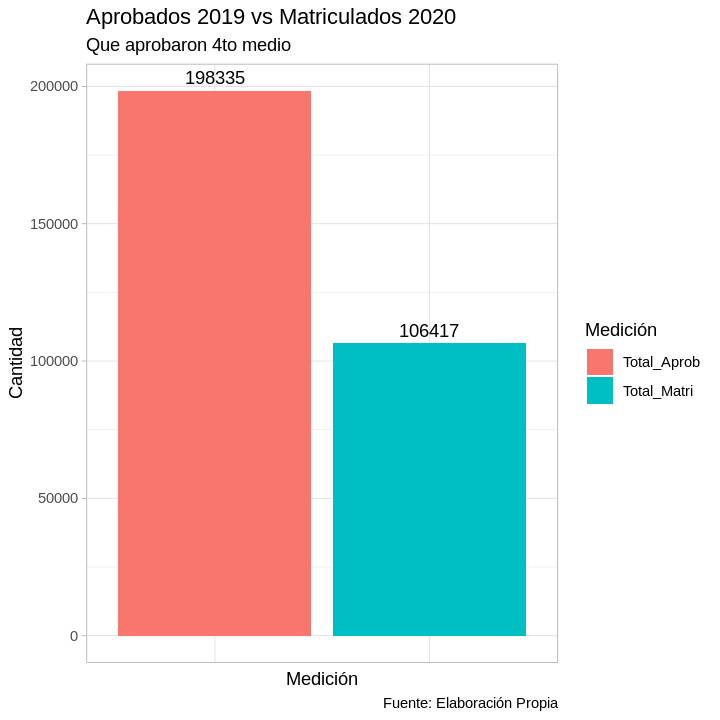

In [83]:
g1 <- ggplot(data=resumen, aes(x=Medicion,y=Cantidad,fill=Medicion)) + geom_col() +
geom_text(aes(label=Cantidad, vjust=-0.5)) +
labs(x='Medición',title='Aprobados 2019 vs Matriculados 2020', subtitle='Que aprobaron 4to medio', caption = "Fuente: Elaboración Propia") +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="Medición") 
g1

In [149]:
# Histograma de Promedios Generales Escolares 2019 (que aprobaron 4to medio) 
# en las Comunas de Chile, que están además en la base de Matrículas 2020
g2 <- ggplot(alumnos_por_comuna, aes(x=Prom_Apro)) + 
geom_histogram(bins = 25,fill="white",col="black") +
geom_vline(aes(xintercept = mean(Prom_Apro) - 2*sd(Prom_Apro)), col='red') +
geom_vline(aes(xintercept = mean(Prom_Apro) + 2*sd(Prom_Apro)),col='red') +
geom_text(data=alumnos_por_comuna, aes(x = mean(Prom_Apro) - 2*sd(Prom_Apro),
y = 0, hjust = 1.5,vjust = 2, label=paste("-2sd:",round(mean(Prom_Apro) - 2*sd(Prom_Apro),2)))) +
geom_text(data=alumnos_por_comuna, aes(x = mean(Prom_Apro) + 2*sd(Prom_Apro),
y = 0, hjust = -0.5,vjust = 2, label=paste("+2sd:",round(mean(Prom_Apro) + 2*sd(Prom_Apro),2)))) +
labs(y='Total', x='Promedio General', title='Distribución de Promedios Generales Escolares 2019 - Comunas Chile', subtitle = 'Alumnos que aprobaron 4to medio y se matricularon en IES', caption = "Fuente: Elaboración Propia")


In [150]:
# Histograma de Promedios de Asistencia Anual Escolares 2019 (que aprobaron 4to medio) 
# en las Comunas de Chile, que están además en la base de Matrículas 2020
g3 <- ggplot(alumnos_por_comuna, aes(x=Asis_Apro)) + 
geom_histogram(bins = 25,fill="white",col="black") +
geom_vline(aes(xintercept = mean(Asis_Apro) - 2*sd(Asis_Apro)), col='blue') +
geom_vline(aes(xintercept = mean(Asis_Apro) + 2*sd(Asis_Apro)),col='blue') +
geom_text(data=alumnos_por_comuna, aes(x = mean(Asis_Apro) - 2*sd(Asis_Apro),
y = 0, hjust = 1.5,vjust = 2, label=paste("-2sd:",round(mean(Asis_Apro) - 2*sd(Asis_Apro),2),"%"))) +
geom_text(data=alumnos_por_comuna, aes(x = mean(Asis_Apro) + 2*sd(Asis_Apro),
y = 0, hjust = -0.5,vjust = 2, label=paste("+2sd:",round(mean(Asis_Apro) + sd(Asis_Apro),2),"%"))) +
labs(y='Total', x='Promedio Asitencia Anual', title='Distribución de Promedios de Asistencia Anual Escolares 2019 - Comunas Chile', subtitle='Alumnos que aprobaron 4to medio y se matricularon en IES',caption = "Fuente: Elaboración Propia")


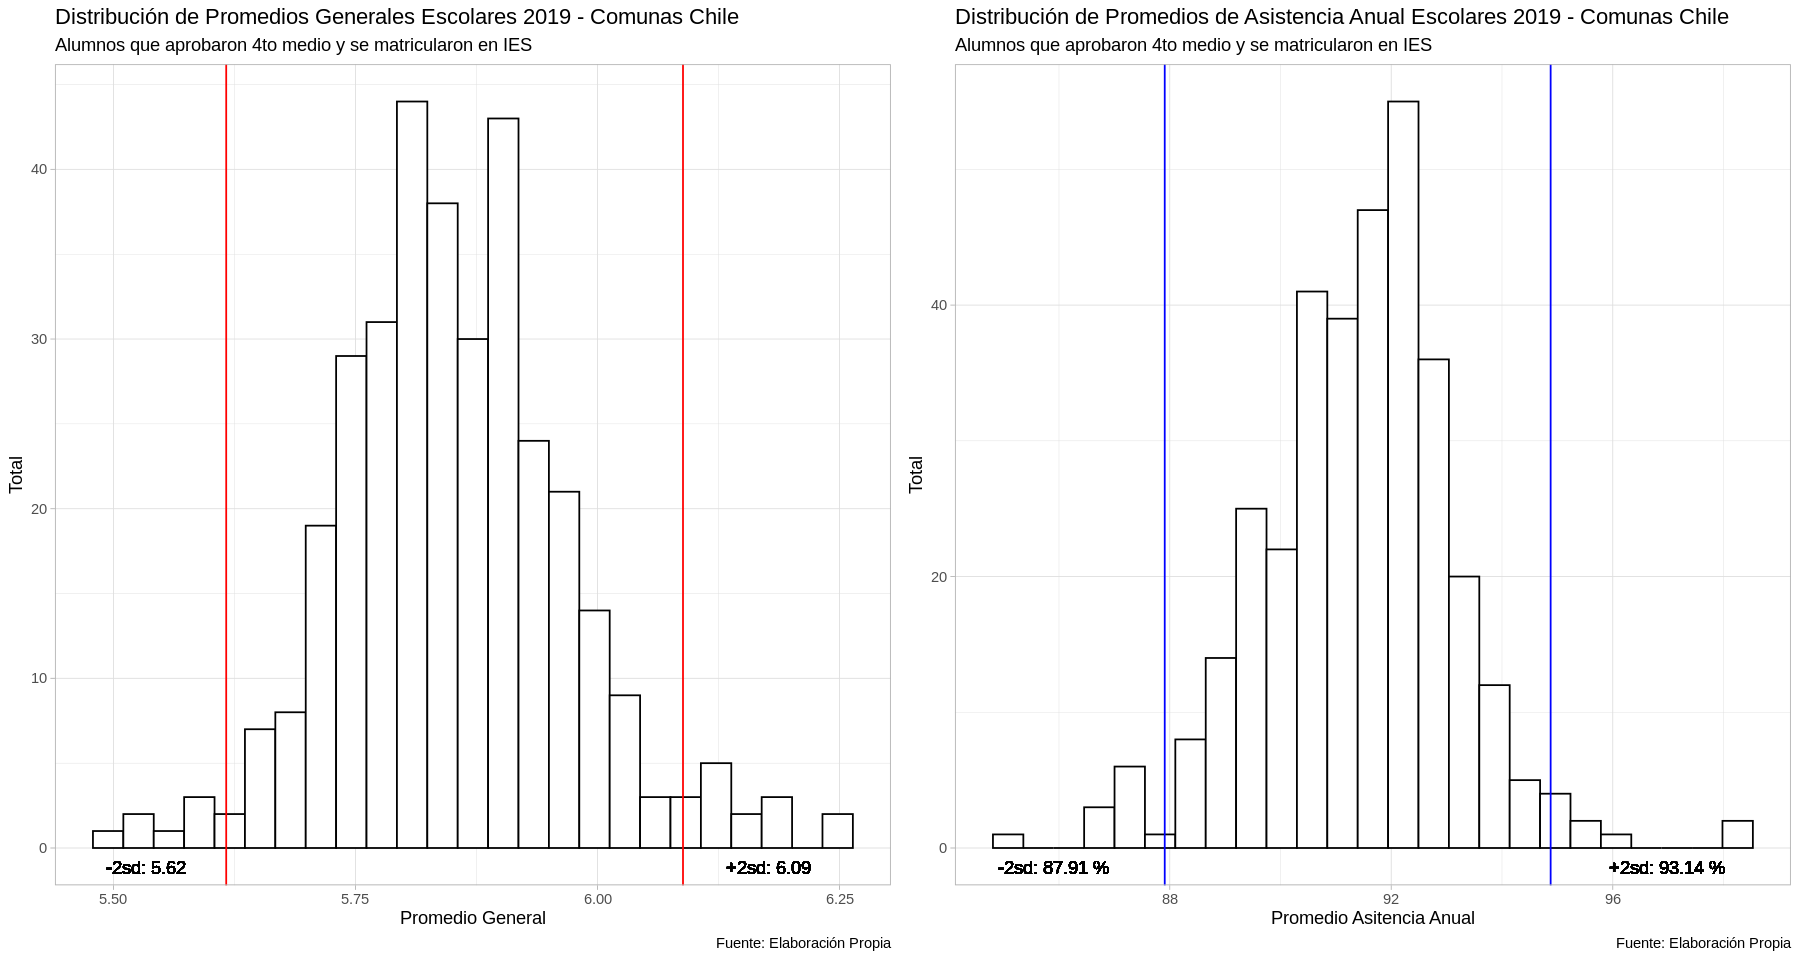

In [151]:
options(repr.plot.width = 15, repr.plot.height = 8)
# Gráfico que muestra en una misma en dos columnas los gráficos g2 y g3
g_origen_comunas <- ggarrange(g2, g3,
                    ncol = 2, nrow = 1)
g_origen_comunas

In [202]:
# Gráfico de columnas con las 20 comunas que tienen el Promedio General de
# Escolares 2019 (que aprobaron 4to medio) mas alto, y que están en la base de 
# Matrículas 2020
options(repr.plot.width = 8, repr.plot.height = 8)
g4 <- ggplot(alumnos_por_comuna %>% arrange(desc(Prom_Apro)) %>% slice(1:20), aes(x=reorder(NOM_COM_ALU,Prom_Apro),y=Prom_Apro)) + 
geom_col(fill="gray", color="#3B8D35") +
geom_text(aes(label=round(Prom_Apro,2), hjust=1.5)) +
labs(y='Promedio General', x='Comuna', title='Comunas de Chile con Promedios Generales Escolares 2019 mas Altos', subtitle='Alumnos que aprobaron 4to medio y que se matricularon en IES',caption = "Fuente: Elaboración Propia") +
coord_flip()

In [203]:
# Gráfico de columnas con las 20 comunas que tienen el Promedio General de
# Escolares 2019 (que aprobaron 4to medio) mas bajo, y que están en la base de 
# Matrículas 2020
g5 <- ggplot(alumnos_por_comuna %>% arrange(Prom_Apro) %>% slice(1:20), aes(x=reorder(NOM_COM_ALU,-Prom_Apro),y=Prom_Apro)) + 
geom_col(fill="gray", color="red") +
geom_text(aes(label=round(Prom_Apro,2), hjust=1.5)) +
labs(y='Promedio General', x='Comuna', title='Comunas de Chile con Promedios Generales Escolares 2019 mas Bajos', subtitle='Alumnos que aprobaron 4to medio y que se matricularon en IES',caption = "Fuente: Elaboración Propia") +
coord_flip()

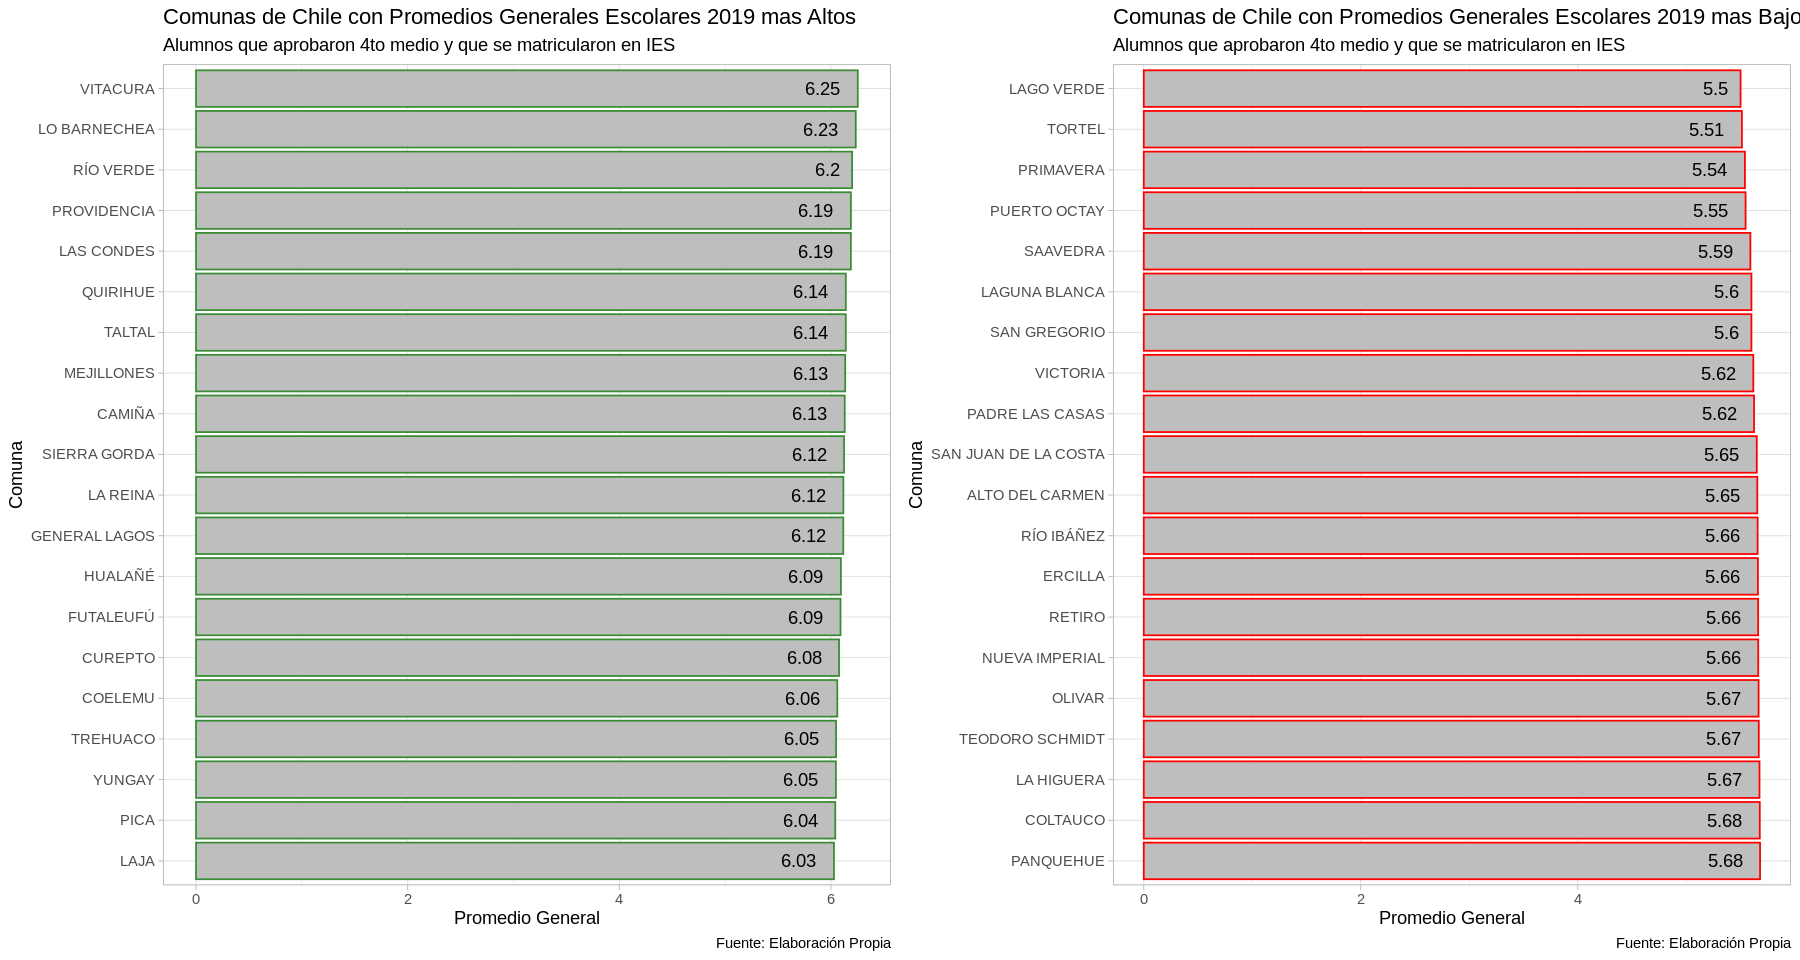

In [204]:
options(repr.plot.width = 15, repr.plot.height = 8)
g_origen_comuna_20 <- ggarrange(g4, g5,
                    ncol = 2, nrow = 1)
g_origen_comuna_20

In [46]:
alumnos_por_tipo_colegio <- alumnos_por_tipo_colegio %>% mutate(NOM_DEPE2 = case_when(COD_DEPE2 == 1 ~ 'Municipal',
                                                          COD_DEPE2 == 2 ~ 'Particular Subvencionado',
                                                          COD_DEPE2 == 3 ~ 'Particular Pagado (o no subvencionado)',
                                                          COD_DEPE2 == 4 ~ 'Corporación de Administración Delegada (DL 3166)',
                                                          COD_DEPE2 == 5 ~ 'Servicio Local de Educación'))

In [47]:
alumnos_por_tipo_colegio

COD_DEPE2 Cant_Apro Cant_Matr Prom_Apro Asis_Apro
1 5          5487      2633     5.765683  89.62004 
2 4          9637      4246     5.701399  89.64556 
3 3         20510     15077     6.231634  92.07081 
4 1         63219     30210     5.811239  89.61939 
5 2         99482     54251     5.836806  91.57548 
  NOM_DEPE2                                       
1 Servicio Local de Educación                     
2 Corporación de Administración Delegada (DL 3166)
3 Particular Pagado (o no subvencionado)          
4 Municipal                                       
5 Particular Subvencionado

In [113]:
# Gráfico de columnas con el Promedio General de los alumnos de la base 
# Rendimientos Escolares 2019 (que aprobaron 4to medio), que además están en la
# base de Matrículas 2020, por tipo de establecimiento (dependencia)
prom <- round(mean(alumnos_por_tipo_colegio$Prom_Apro),2)
g6 <- ggplot(data=alumnos_por_tipo_colegio, aes(x=NOM_DEPE2,y=Prom_Apro)) + 
geom_col(aes(fill=NOM_DEPE2)) + 
geom_hline(aes(yintercept = prom)) +
geom_text(aes(4.5, prom, label = paste("Promedio:",prom), vjust = - 1)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Dependencia', y='Promedio General', title='Promedio General por Dependencia', subtitle='2019', caption = "Fuente: Elaboración Propia") 


In [134]:
# Gráfico de columnas con el Promedio de Asistencia Anual de los alumnos de la base 
# Rendimientos Escolares 2019 (que aprobaron 4to medio), que además están en la
# base de Matrículas 2020, por tipo de establecimiento (dependencia)
prom_asis <- round(mean(alumnos_por_tipo_colegio$Asis_Apro),2)
g7 <- ggplot(data=alumnos_por_tipo_colegio, aes(x=NOM_DEPE2,y=Asis_Apro)) + 
geom_col(aes(fill=NOM_DEPE2)) + 
geom_hline(aes(yintercept = prom_asis)) +
geom_text(aes(4.5, prom_asis, label = paste("Promedio:",prom_asis,"%"), vjust = - 1)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Dependencia', y='Promedio Asistencia Anual', title='Promedio Asistencia Anual por Dependencia', subtitle='2019', caption = "Fuente: Elaboración Propia") 


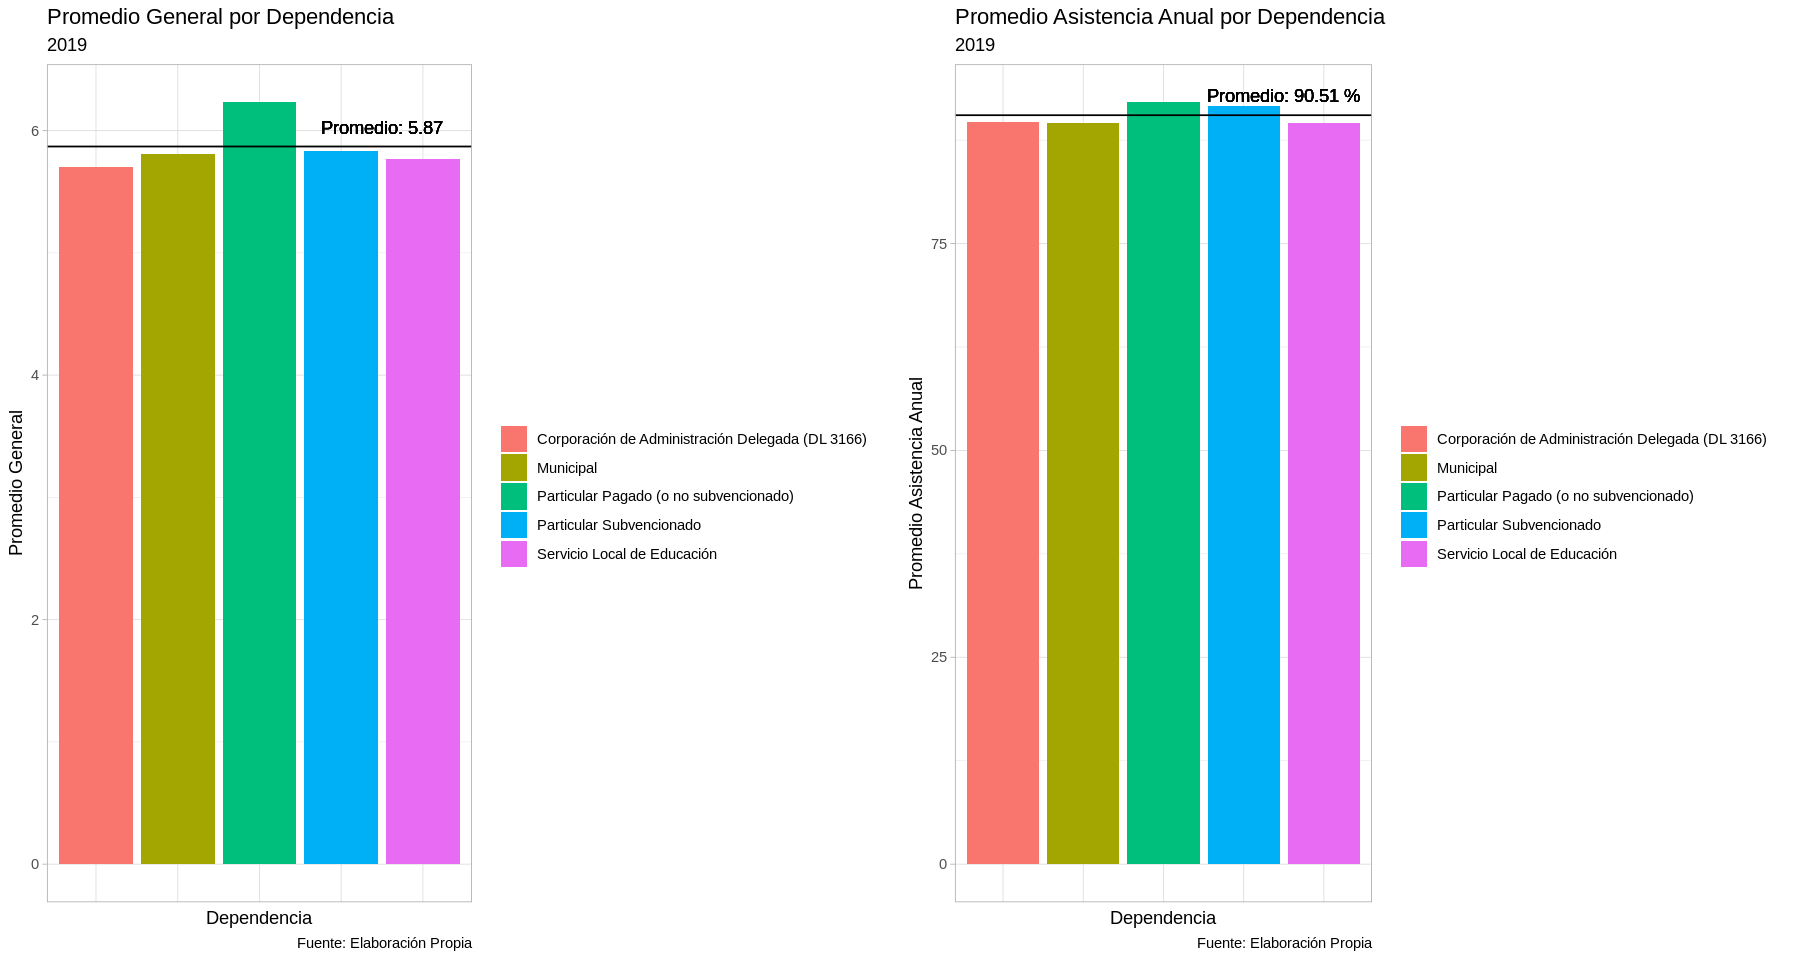

In [135]:
options(repr.plot.width = 15, repr.plot.height = 8)
g_origen_tipo_colegio <- ggarrange(g6, g7,
                    ncol = 2, nrow = 1)
g_origen_tipo_colegio

In [132]:
# Gráfico de columnas con el Promedio General de los alumnos de la base de
# Rendimientos Escolares 2019 (que aprobaron 4to medio), que además están en la
# base de Matrículas 2020, por tipo de IES en la que se matricularon.
prom_gnral <- round(mean(alumnos_por_tipo_ies$Prom_Apro),2)
g8 <- ggplot(data=alumnos_por_tipo_ies %>% filter(!is.na(alumnos_por_tipo_ies)), aes(x=tipo_inst_1,y=Prom_Apro)) + 
geom_col(aes(fill=tipo_inst_1)) + 
geom_hline(aes(yintercept = prom_gnral)) +
geom_text(aes(2.5, prom_gnral, label = paste("Promedio:",prom_gnral), vjust = - 0.5)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Tipo IES', y='Promedio General', title='Promedio General por Tipo IES', subtitle='2019', caption = "Fuente: Elaboración Propia") 


In [139]:
# Gráfico de columnas con el Promedio de Asistencia Anual de los alumnos de la 
# base de Rendimientos Escolares 2019 (que aprobaron 4to medio), que además 
# están en la base de Matrículas 2020, por tipo de IES en la que se matricularon.
prom_asis_2 <- round(mean(alumnos_por_tipo_ies$Asis_Apro),2)
g9 <- ggplot(data=alumnos_por_tipo_ies %>% filter(!is.na(alumnos_por_tipo_ies)), aes(x=tipo_inst_1,y=Asis_Apro)) + 
geom_col(aes(fill=tipo_inst_1)) + 
geom_hline(aes(yintercept = prom_asis_2)) +
geom_text(aes(2.5, prom_asis_2, label = paste("Promedio:",prom_asis_2,"%"), vjust = - 0.5)) +
theme(axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="") +
labs(x='Tipo IES', y='Promedio Asistencia Anual', title='Promedio Asistencia Anual por Tipo IES', subtitle='2019', caption = "Fuente: Elaboración Propia") 


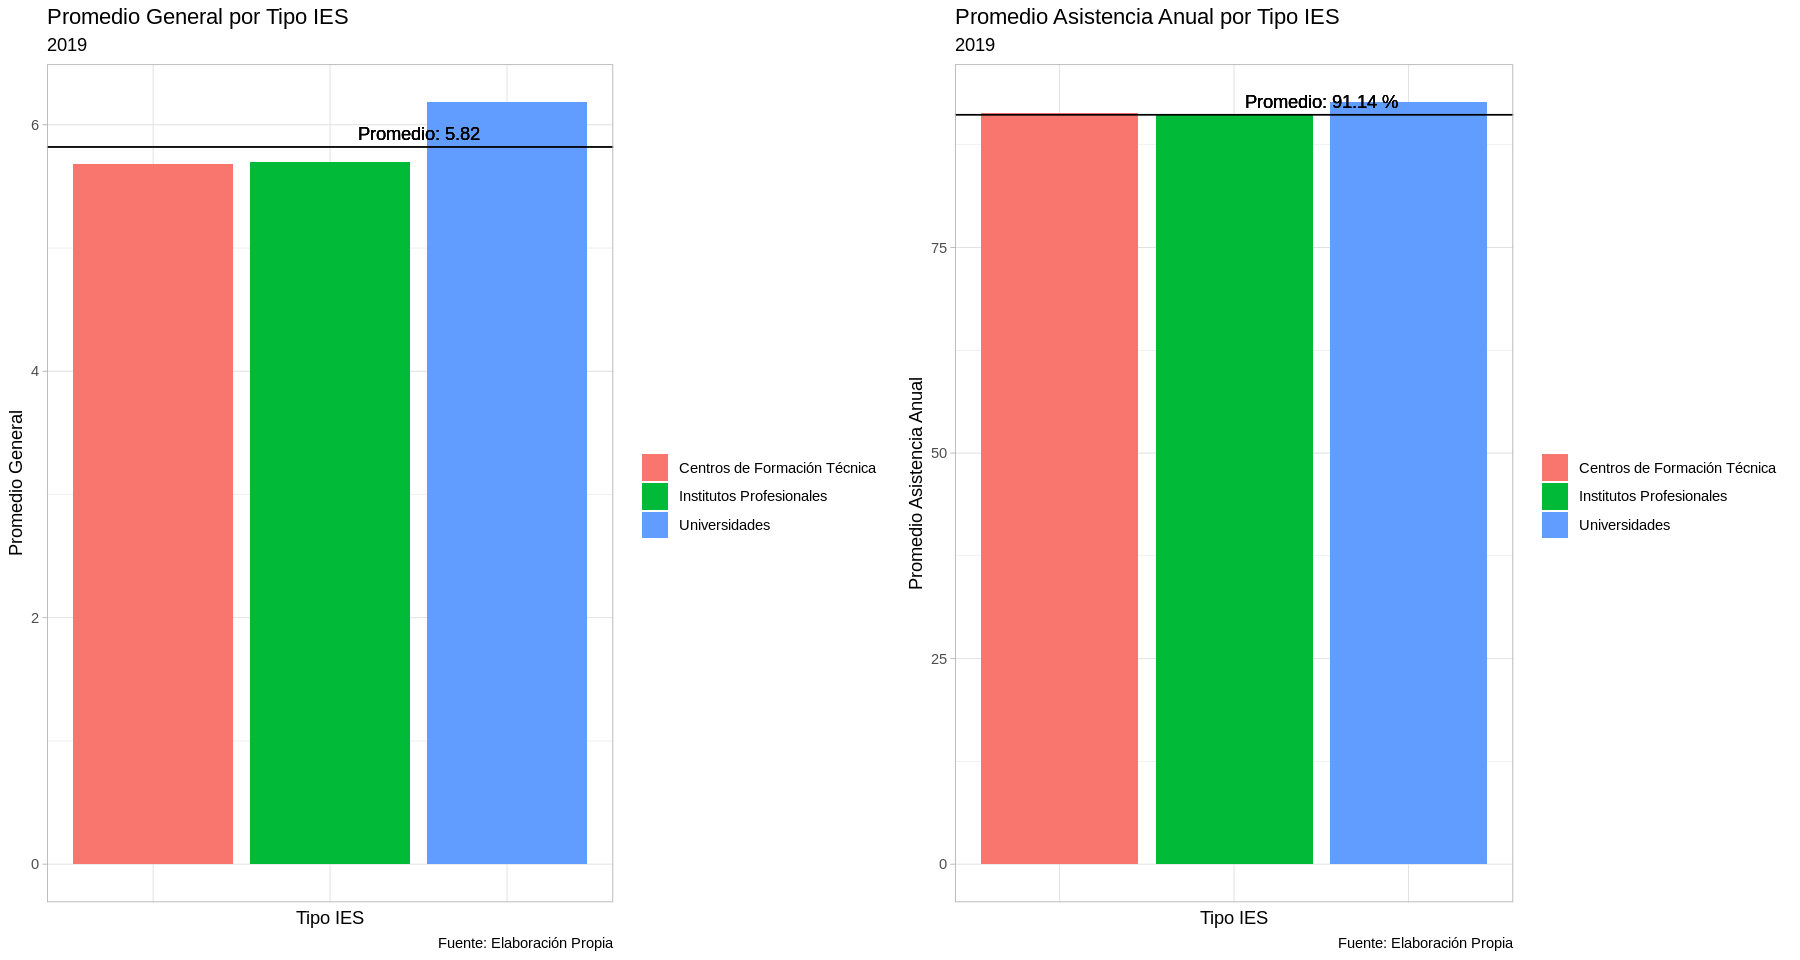

In [140]:
options(repr.plot.width = 15, repr.plot.height = 8)
g_origen_tipo_ies <- ggarrange(g8, g9,
                    ncol = 2, nrow = 1)
g_origen_tipo_ies

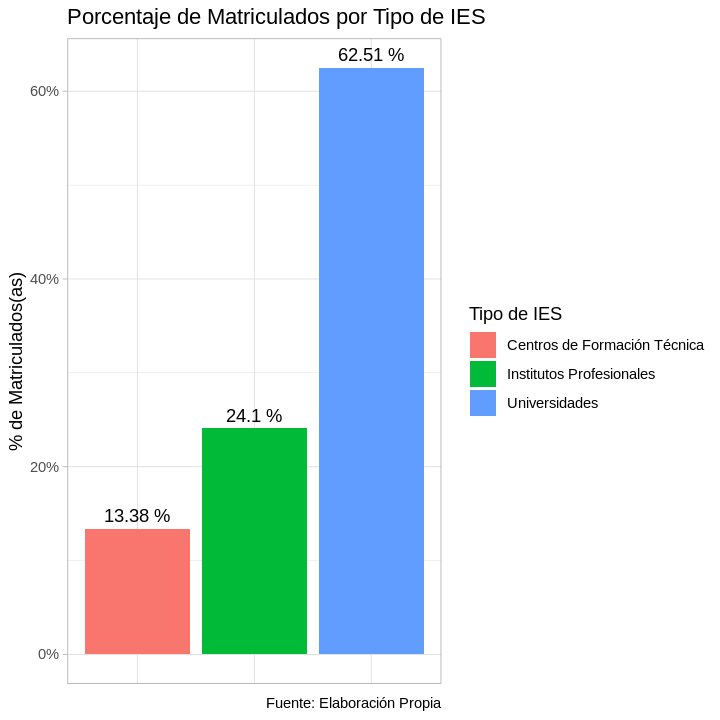

In [121]:
# Gráfico de columnas con el % de alumnos en base de Matriculados 2020, 
# por tipo de IES en la que se matricularon, que aprobaron 4to medio en la base 
# de Rendimientos Escolares 2019.
options(repr.plot.width = 6, repr.plot.height = 6)
g10 <- ggplot(alumnos_por_tipo_ies %>% filter(!is.na(alumnos_por_tipo_ies)), aes(x=tipo_inst_1,y=Cant_Matr*1.0/sum(Cant_Matr))) + 
geom_col(aes(fill=tipo_inst_1)) + 
labs(x='Tipo de IES', y='% de Matriculados(as)', title='Porcentaje de Matriculados por Tipo de IES', caption = "Fuente: Elaboración Propia") +
geom_text(aes(label=paste(round(Cant_Matr*100.0/sum(Cant_Matr),2),"%"), vjust=-0.5)) +
theme(axis.title.x = element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank()) +
scale_fill_discrete(name="Tipo de IES") +
scale_y_continuous(labels = scales::percent_format(accuracy = 1))
g10

*   **Conclusión**

A partir de las consultas ejecutadas y los gráficos construídos es posible concluir que solo un 54% de los alumnos que aprobaron 4to medio en la base Rendimiento 2019 se encuentran en la base de Matrícula de IES del 2020. 

Sobre el origen de los alumnos en base Matrícula 2020 que aprobaron 4to medio en la base 2019, se analizaron los promedios generales por tipo de colegio (dependencia) y por comuna. En relación con la dependencia, los particulares pagados tuvieron en promedio las nota mas alta (6.23), seguidos por los particulares no subvencionados (5.84), y los municipales (5.81). En relación con las comunas, el 95% de los promedios (siguiendo la regla empírica de la curva normal) se encuentran en el intervalo [5.62, 6.09]. Entre las comunas con promedios más altos están Vitacura, Lo Barnechea, Río Verde, Providencia, y Las Condes. Con los promedios mas bajos están las comunas Lago Verde, Tortel, Primavera, Puerto Octay, Saavedra.

Sobre el "destino" de los alumnos en base Matrícula 2020 que aprobaron 4to medio en la base 2019, se calculó la proporción de alumnos y los promedios generales por tipo de IES. El 13.38% de alumnos se matricularon en Centros de Formación Técnica, el 24.1% en Institutos Profesionales, y el 62.51% en Universidades. En cuanto a los promedios, como esperado, las universidades recibieron los alumnos con promedios mas altos (6.18), seguido de los Institutos Profesionales (5.70) y los Centros de Formación Técnica (5.68).

Finalmente, con base en los cálculos y gráficos, puede decirse que el tipo de IES en el cual los alumnos se matriculan está relacionado con el promedio general al finalizar cuarto medio, que a su vez parece estar vinculado con la comuna de residencia del alumno y el tipo de colegio (dependencia) del que se gradúan. Sin embargo, sería necesario analizar en el tiempo esta hipótesis, además de un análisis causal para poder establecer con certeza ésto.

